In [1]:
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import cv2
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import glob
from natsort import natsorted, ns


import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Image

import csv
import os
import psutil
print(psutil.virtual_memory())

svmem(total=8244793344, available=2324561920, percent=71.8, used=5370433536, free=1823363072, active=4784541696, inactive=1269080064, buffers=58773504, cached=992223232, shared=288006144, slab=142712832)


In [2]:
#reading all the json files,which are sorted natuarally(uncomment when new json files are added)
#json_arr = []
#for i in range(0,14193):
#    with open('/home/ayush/Desktop/img_json3/' + str(i) + '.json') as f:
#        d1 = json.load(f)
#        json_arr.append(d1)



In [3]:
#getting all the list of json files present in the directory in sorted manner(uncomment when new json files are added)
#from natsort import natsorted, ns
#import os
# This is the path where all the files are stored.
#json_path = '/home/ayush/Desktop/img_json3'
# Open one of the files,
#lst = []
#for data_file in os.listdir(json_path):
#     lst.append(data_file)
#json_file = natsorted(lst, key=lambda y: y.lower())
#json_file

In [4]:
#peeps = []
#for j in range(0,14193):
#    peeps.append(len(json_arr[j]['people']))
       

In [5]:
#lets connect the number of peeps,json file name and arr[] i.e keypoints
#mapped = zip(json_file, peeps)

# converting values to print as set 
#mapped = set(mapped) 
#json_to_peeps = list(mapped)
#json_to_peeps = natsorted(json_to_peeps)
#json_to_peeps[2][1]

In [6]:
#deleting all the json file with zero people
#json_path = '/home/ayush/Desktop/img_json3'
#for i in range(len(os.listdir(json_path))):
#    if json_to_peeps[i][1] == 0 and os.path.isfile(json_path + '/' + str(i) + '.json'):
#        print(i)
#        os.remove(json_path + '/' + str(i) + '.json')


In [7]:
#renaming the json files in sequence manner

# Function to rename multiple files 
#def main(): 
#	i = 0
#	
#	for filename in os.listdir("/home/ayush/Desktop/img_json3"): 
#		dst = str(i) + ".json"
#		src ='/home/ayush/Desktop/img_json3'+ "/" + filename 
#		dst ='/home/ayush/Desktop/img_json'+ "/" + dst 
#		
#		# rename() function will 
#		# rename all the files 
#		os.rename(src, dst) 
#		i += 1
#
# Driver Code 
#if __name__ == '__main__': 
#	
#	# Calling main() function 
#	main() 


In [8]:
folder_path = '/home/ayush/Desktop/img_json'
json_arr2 = []
for i in range(0,len(os.listdir(folder_path))-1):
    with open('/home/ayush/Desktop/img_json/' + str(i) + '.json') as f2:
        d2 = json.load(f2)
        json_arr2.append(d2)


In [9]:
from natsort import natsorted, ns
# This is the path where all the files are stored.
json_path2 = '/home/ayush/Desktop/img_json'
# Open one of the files,
lst2 = []
for data_file2 in os.listdir(json_path2):
     lst2.append(data_file2)
json_file2 = natsorted(lst2, key=lambda y: y.lower())
len(json_file2)

10181

In [10]:
peeps2 = []
for j in range(0,len(os.listdir(folder_path))-1):
    peeps2.append(len(json_arr2[j]['people']))
       

In [11]:
#lets connect the number of peeps,json file name and arr[] i.e keypoints
mapped2 = zip(json_file2, peeps2)

# converting values to print as set 
mapped2 = set(mapped2) 
json_to_peeps2 = list(mapped2)
json_to_peeps2 = natsorted(json_to_peeps2)
json_to_peeps2

[('0.json', 1),
 ('1.json', 9),
 ('2.json', 1),
 ('3.json', 1),
 ('4.json', 1),
 ('5.json', 1),
 ('6.json', 1),
 ('7.json', 1),
 ('8.json', 2),
 ('9.json', 1),
 ('10.json', 1),
 ('11.json', 1),
 ('12.json', 20),
 ('13.json', 1),
 ('14.json', 3),
 ('15.json', 1),
 ('16.json', 5),
 ('17.json', 2),
 ('18.json', 1),
 ('19.json', 4),
 ('20.json', 4),
 ('21.json', 2),
 ('22.json', 6),
 ('23.json', 1),
 ('24.json', 11),
 ('25.json', 5),
 ('26.json', 7),
 ('27.json', 3),
 ('28.json', 2),
 ('29.json', 1),
 ('30.json', 1),
 ('31.json', 1),
 ('32.json', 2),
 ('33.json', 8),
 ('34.json', 15),
 ('35.json', 1),
 ('36.json', 1),
 ('37.json', 1),
 ('38.json', 3),
 ('39.json', 1),
 ('40.json', 2),
 ('41.json', 2),
 ('42.json', 1),
 ('43.json', 2),
 ('44.json', 2),
 ('45.json', 2),
 ('46.json', 19),
 ('47.json', 1),
 ('48.json', 7),
 ('49.json', 1),
 ('50.json', 3),
 ('51.json', 1),
 ('52.json', 2),
 ('53.json', 3),
 ('54.json', 2),
 ('55.json', 14),
 ('56.json', 3),
 ('57.json', 4),
 ('58.json', 1),
 (

In [12]:
#get all the keypoints from one json file into a alist(commented this because removes the arr with zero people,will break the sequence)
#arr = []
#for j in range(0,14193):
#    keypt = json_normalize(json_arr[j]['people'])
#    if len(json_arr[j]['people']) > 0:
#        for i in range(len(keypt['pose_keypoints_2d'])):
#            arr.append(keypt['pose_keypoints_2d'][i])
    

In [13]:
#folder_path = '/home/ayush/Desktop/img_json'

arr = []
for j in range(0,len(os.listdir(folder_path))-1):
    keypt = json_normalize(json_arr2[j]['people'])
    for i in range(len(keypt['pose_keypoints_2d'])):
        arr.append(keypt['pose_keypoints_2d'][i])
    

In [14]:
#map a set of json file to the gesture keypoints
ppl = []
for i in range(len(json_to_peeps2)):
    ppl.append(json_to_peeps2[i][1])
    
# divide the arr list in chunks of size relative tono of people






In [15]:
ppl[0]

1

In [16]:
arr

[[435.216,
  556.518,
  0.759757,
  468.066,
  594.419,
  0.768113,
  432.636,
  596.949,
  0.771275,
  414.892,
  655.133,
  0.559257,
  435.322,
  690.405,
  0.469455,
  498.393,
  591.915,
  0.728778,
  516.136,
  652.528,
  0.41057,
  483.228,
  675.279,
  0.204509,
  450.363,
  695.593,
  0.697831,
  412.389,
  720.77,
  0.768891,
  399.817,
  819.297,
  0.63425,
  495.847,
  687.94,
  0.629365,
  475.734,
  723.361,
  0.695611,
  465.555,
  819.282,
  0.577914,
  430.066,
  551.485,
  0.589299,
  442.775,
  546.356,
  0.666437,
  0,
  0,
  0,
  468.051,
  541.363,
  0.518012],
 [498.143,
  611.805,
  0.820315,
  503.755,
  637.4,
  0.84834,
  472.541,
  643.05,
  0.826107,
  475.318,
  680.101,
  0.512774,
  495.342,
  645.821,
  0.2512,
  534.989,
  631.688,
  0.781581,
  543.614,
  671.515,
  0.597836,
  0,
  0,
  0,
  486.844,
  719.909,
  0.834919,
  483.927,
  785.356,
  0.797925,
  486.731,
  847.87,
  0.696296,
  526.523,
  717.165,
  0.766829,
  535.056,
  768.215,
  0.74

In [17]:
14193 - len(os.listdir(folder_path)) 

4012

In [18]:
# removing the pose in which least amount of points has not been detected (comment it will implement it later)
#max_zeroes = 30
#valid_arr = []
#for i in range(len(arr)):
#    if arr[i].count(0) < max_zeroes:
#        valid_arr.append(arr[i])
            

In [19]:
frame = cv2.imread("white.jpg")
frameCopy = np.copy(frame)
frameCopy2 = np.copy(frame)

frameWidth = frame.shape
frameHeight = frame.shape[0]
threshold = 0.1 
#get the points
POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]
#remove the confidence map
point = []
for j in range(len(arr)):
    for i in range(0,53):
        if i == 0 or i == 1 or i == 3 or i == 4 or i == 6 or i == 7 or i ==9 or i == 10 or i ==12 or i ==13 or i ==15 or i ==16 or i ==18 or i ==19 or i ==21 or i ==22 or i ==24 or i ==25 or i ==27 or i ==28 or i == 30 or i ==31 or i ==33 or i == 34 or i == 36 or i ==37 or i ==39 or i == 40 or i ==42 or i ==43  or i == 45 or i == 46 or i ==48 or i == 49 or i == 51 or i ==52:
            point.append(arr[j][i])
 
   


In [20]:
len(point)

1310508

In [21]:
#change the co-ordinate points to integer
pts = []
for i in range(len(point)):
    pts.append(int(point[i]))



In [22]:
len(pts)/2

655254

In [23]:
# Python3 program to Convert 1D 
    # list to 2D list 
from itertools import islice 
def convert(lst, var_lst):
    idx = 0
    for var_len in var_lst: 
        yield lst[idx : idx + var_len] 
        idx += var_len 

# Driver code 
s = len(pts)/2
lst = pts
var_lst = [2] * s
#print(list(convert(lst, var_lst))) 
all_body_coordinates = list(convert(lst, var_lst))

In [24]:
my_list = all_body_coordinates
# Yield successive n-sized                   
# chunks from l. 
def divide_chunks(l, n): 
	                                                       # x -> single_body_set
                                                           # points -> all_body_coordinates
	# looping till length l 
	for i in range(0, len(l), n): 
		yield l[i:i + n] 

# How many elements each 
# list should have 
n = 18

single_body_set = list(divide_chunks(my_list, n)) 
#print (single_body_set) 


In [25]:
#single_body_set[0][6]  = [None]

In [26]:
single_body_set[0]

[[435, 556],
 [468, 594],
 [432, 596],
 [414, 655],
 [435, 690],
 [498, 591],
 [516, 652],
 [483, 675],
 [450, 695],
 [412, 720],
 [399, 819],
 [495, 687],
 [475, 723],
 [465, 819],
 [430, 551],
 [442, 546],
 [0, 0],
 [468, 541]]

In [27]:
#replace zeroes by previous co-ordinate 
def replace_zero():
    for j in range(len(single_body_set)):
        for i in range(len(single_body_set[0])):
            if single_body_set[j][i][0] == 0 and  single_body_set[j][i][1] == 0:
                single_body_set[j][i][0]  =  single_body_set[j][i-1][0]
                single_body_set[j][i][1]  =  single_body_set[j][i-1][1]


In [28]:
#divide the 'single_body_set' in chunks relative to the ppl


lst = single_body_set
var_lst = ppl
#print(list(convert(lst, var_lst))) 
full_image_pose = list(convert(lst, var_lst))

In [29]:
#getting the angles between upper leg and the lower leg and also uppeer leg and middle body
import math
single_body_set[0]

def angle_btw_body_parts(n,i,j,k):
    x1 = single_body_set[n][i][0]
    y1 = single_body_set[n][i][1]
    x3 = single_body_set[n][j][0]
    y3 = single_body_set[n][j][1]
    x4 = single_body_set[n][k][0]
    y4 = single_body_set[n][k][1]
    m1 = (y1 - y3)/(x1-x3)
    m2 = (y3 - y4)/(x3-x4)
    m = (m2-m1)/(1 + m2*m1)
    return math.degrees(math.atan(m)) 

    
interact(angle_btw_body_parts,n=widgets.IntSlider(min=0,max=len(single_body_set)-1,step=1,value=9),
                         i=widgets.IntSlider(min=0,max=18,step=1,value=10),
                         j=widgets.IntSlider(min=0,max=18,step=1,value=11),
                         k=widgets.IntSlider(min=0,max=18,step=1,value=12));


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT05LCBkZXNjcmlwdGlvbj11J24nLCBtYXg9MzY0MDIpLCBJbnRTbGlkZXIodmFsdWU9MTAsIGRlc2NyaXB0aW9uPXUnaScsIG3igKY=


In [30]:
# find the images extending outside the boundary and translating them to get its view clearer(optional though!)
#single_body_set[11]
#t1 = []
#t2 = []
#for j in range(len(single_body_set)):
#    for i in range(18):
#        if single_body_set[j][i][1] > 1000:
#            t1.append('true')
            #single_body_set[j][i][1] = single_body_set[j][i][1] -100
#        elif single_body_set[j][i][0] > 1000:
            #single_body_set[j][i][0] = single_body_set[j][i][0] -100
#            t2.append('true')

        



In [31]:
len(single_body_set)


36403

In [32]:
#points = single_body_set[11] 

#for pair in POSE_PAIRS:
#    partA = pair[0]
#    partB = pair[1]
#    if points[partA] and points[partB]:
#        cv2.line(frame, tuple(points[partA]), tuple(points[partB]), (255, 144, 0), 3)
#plt.figure(figsize=[10,10])
#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [33]:
len(full_image_pose[1])

9

In [34]:
single_body_set[0]

[[435, 556],
 [468, 594],
 [432, 596],
 [414, 655],
 [435, 690],
 [498, 591],
 [516, 652],
 [483, 675],
 [450, 695],
 [412, 720],
 [399, 819],
 [495, 687],
 [475, 723],
 [465, 819],
 [430, 551],
 [442, 546],
 [0, 0],
 [468, 541]]

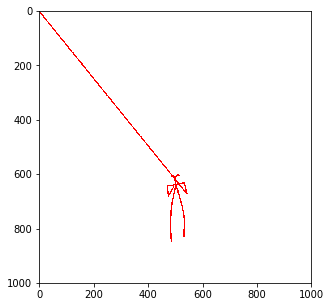

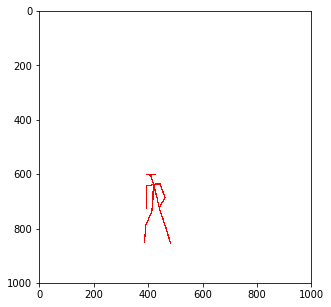

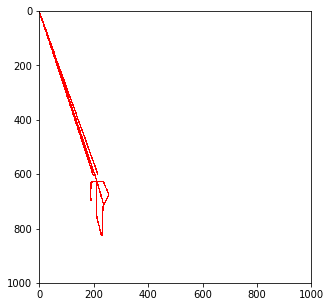

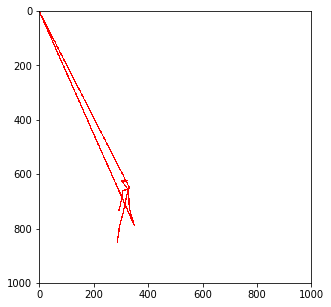

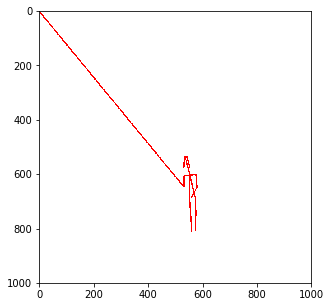

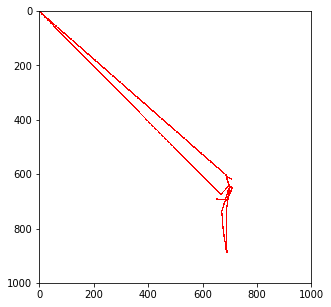

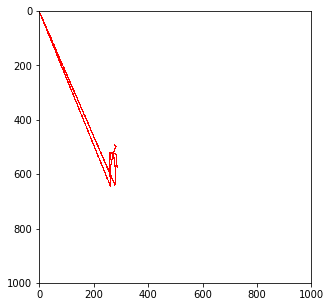

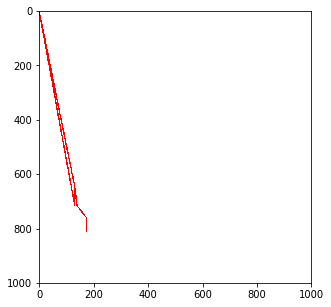

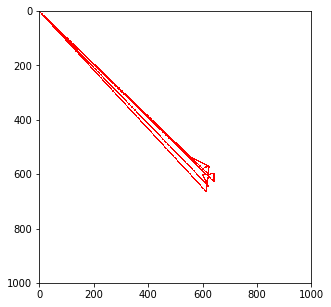

In [35]:
for i in range(ppl[1]):
    s = 'frameCopy' + str(i)
    f  = np.copy(frame)

    s = f

    points = full_image_pose[1][i] 

    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(s, tuple(points[partA]), tuple(points[partB]), (0, 0, 255), 3)
    plt.figure(figsize=[5,5])
    plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))


In [39]:
valid_points = []
zero_arr = [0,0]

def show(j):
    count = 0
    for i in range(ppl[j]):
        s = 'frameCopy' + str(i)
        f  = np.copy(frame)

        s = f

        points = full_image_pose[j][i] 
        for l in range(18):
            if points[l] == zero_arr:
                count = count + 1
#                print(count)
        if count < 7:
#            replace_zero()
            valid_points.append(points)
            for pair in POSE_PAIRS:
                partA = pair[0]
                partB = pair[1]

                if points[partA] and points[partB]:
                    cv2.line(s, tuple(points[partA]), tuple(points[partB]), (0, 0, 255), 3)
            plt.figure(figsize=[5,5])
            plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))
#           plt.savefig('./extracted_pose/' + str(i) + '.jpg')
        else:
            print('This pose do not have enough keypoints')
        

In [40]:
interact(show,j=widgets.IntSlider(min=1,max=len(full_image_pose)-1,step=1,value=1),);


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J2onLCBtYXg9MTAxNzksIG1pbj0xKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2XigKY=


In [42]:
full_image_pose[1][7][1]
#for i in range(18):
    
#if all([ v == 0 for v in full_image_pose[1][7] ]):
#    print('true')

[131, 645]

In [43]:
#full_image_pose[1][7]
count = 0
zero_arr = [0,0]
for k in range(len(ppl)):
    for j in range(ppl[k]):
        for i in range(18):
            if zero_arr == full_image_pose[k][j][i]:
                print(i,j,k)
               # print(full_image_pose[k][j][i])
                count = count + 1


(16, 0, 0)
(7, 0, 1)
(0, 2, 1)
(14, 2, 1)
(15, 2, 1)
(3, 3, 1)
(4, 3, 1)
(10, 3, 1)
(4, 4, 1)
(4, 5, 1)
(16, 5, 1)
(10, 6, 1)
(13, 6, 1)
(0, 7, 1)
(2, 7, 1)
(3, 7, 1)
(4, 7, 1)
(5, 7, 1)
(6, 7, 1)
(7, 7, 1)
(12, 7, 1)
(13, 7, 1)
(14, 7, 1)
(15, 7, 1)
(16, 7, 1)
(17, 7, 1)
(4, 8, 1)
(7, 8, 1)
(9, 8, 1)
(10, 8, 1)
(11, 8, 1)
(12, 8, 1)
(13, 8, 1)
(8, 0, 2)
(9, 0, 2)
(10, 0, 2)
(11, 0, 2)
(12, 0, 2)
(13, 0, 2)
(16, 0, 2)
(4, 0, 3)
(9, 0, 3)
(10, 0, 3)
(12, 0, 3)
(13, 0, 3)
(16, 0, 3)
(15, 0, 4)
(3, 0, 6)
(4, 0, 6)
(6, 0, 6)
(7, 0, 6)
(8, 0, 6)
(9, 0, 6)
(10, 0, 6)
(11, 0, 6)
(12, 0, 6)
(13, 0, 6)
(4, 0, 7)
(6, 0, 7)
(7, 0, 7)
(8, 0, 7)
(9, 0, 7)
(10, 0, 7)
(11, 0, 7)
(12, 0, 7)
(13, 0, 7)
(3, 0, 8)
(4, 0, 8)
(6, 0, 8)
(7, 0, 8)
(8, 0, 8)
(9, 0, 8)
(10, 0, 8)
(11, 0, 8)
(12, 0, 8)
(13, 0, 8)
(17, 0, 8)
(0, 1, 8)
(1, 1, 8)
(5, 1, 8)
(6, 1, 8)
(7, 1, 8)
(8, 1, 8)
(9, 1, 8)
(10, 1, 8)
(11, 1, 8)
(12, 1, 8)
(13, 1, 8)
(14, 1, 8)
(15, 1, 8)
(16, 1, 8)
(17, 1, 8)
(3, 0, 9)
(4, 0, 9)
(6, 0, 9)
(7

(13, 6, 200)
(9, 7, 200)
(10, 7, 200)
(12, 7, 200)
(13, 7, 200)
(16, 0, 201)
(4, 1, 201)
(14, 1, 201)
(16, 1, 201)
(4, 0, 202)
(16, 0, 202)
(7, 1, 202)
(12, 1, 202)
(13, 1, 202)
(4, 2, 202)
(6, 2, 202)
(7, 2, 202)
(8, 2, 202)
(9, 2, 202)
(10, 2, 202)
(11, 2, 202)
(12, 2, 202)
(13, 2, 202)
(6, 3, 202)
(7, 3, 202)
(8, 3, 202)
(9, 3, 202)
(10, 3, 202)
(11, 3, 202)
(12, 3, 202)
(13, 3, 202)
(15, 3, 202)
(17, 3, 202)
(16, 0, 203)
(7, 1, 203)
(17, 1, 203)
(7, 0, 204)
(8, 0, 204)
(9, 0, 204)
(10, 0, 204)
(11, 0, 204)
(12, 0, 204)
(13, 0, 204)
(17, 0, 204)
(3, 0, 205)
(4, 0, 205)
(6, 0, 205)
(7, 0, 205)
(8, 0, 205)
(9, 0, 205)
(10, 0, 205)
(11, 0, 205)
(12, 0, 205)
(13, 0, 205)
(17, 0, 205)
(3, 0, 206)
(4, 0, 206)
(14, 0, 206)
(16, 0, 206)
(17, 1, 206)
(9, 2, 206)
(10, 2, 206)
(12, 2, 206)
(13, 2, 206)
(16, 2, 206)
(8, 0, 207)
(9, 0, 207)
(10, 0, 207)
(11, 0, 207)
(12, 0, 207)
(13, 0, 207)
(8, 0, 208)
(9, 0, 208)
(10, 0, 208)
(12, 0, 208)
(13, 0, 208)
(10, 0, 209)
(13, 0, 209)
(3, 1, 209)
(4, 

(12, 7, 384)
(13, 7, 384)
(7, 0, 385)
(16, 2, 385)
(7, 3, 385)
(7, 4, 385)
(6, 0, 386)
(7, 0, 386)
(9, 0, 386)
(10, 0, 386)
(11, 0, 386)
(12, 0, 386)
(13, 0, 386)
(16, 1, 387)
(6, 2, 387)
(7, 2, 387)
(15, 2, 387)
(17, 2, 387)
(0, 3, 387)
(4, 3, 387)
(14, 3, 387)
(15, 3, 387)
(2, 0, 388)
(3, 0, 388)
(4, 0, 388)
(5, 0, 388)
(6, 0, 388)
(7, 0, 388)
(8, 0, 388)
(9, 0, 388)
(10, 0, 388)
(11, 0, 388)
(12, 0, 388)
(13, 0, 388)
(17, 0, 388)
(10, 0, 390)
(13, 0, 390)
(6, 1, 390)
(7, 1, 390)
(15, 1, 390)
(17, 1, 390)
(3, 2, 390)
(4, 2, 390)
(7, 2, 390)
(9, 2, 390)
(10, 2, 390)
(14, 2, 390)
(3, 3, 390)
(4, 3, 390)
(7, 3, 390)
(8, 3, 390)
(9, 3, 390)
(10, 3, 390)
(11, 3, 390)
(12, 3, 390)
(13, 3, 390)
(16, 3, 390)
(3, 0, 391)
(4, 0, 391)
(7, 0, 391)
(9, 0, 391)
(10, 0, 391)
(12, 0, 391)
(13, 0, 391)
(17, 0, 391)
(10, 1, 391)
(10, 2, 391)
(13, 2, 391)
(0, 3, 391)
(9, 3, 391)
(10, 3, 391)
(13, 3, 391)
(14, 3, 391)
(15, 3, 391)
(6, 4, 391)
(7, 4, 391)
(7, 5, 391)
(9, 5, 391)
(10, 5, 391)
(12, 5, 391)

(7, 0, 569)
(9, 0, 569)
(10, 0, 569)
(11, 0, 569)
(12, 0, 569)
(13, 0, 569)
(6, 0, 570)
(7, 0, 570)
(9, 0, 570)
(10, 0, 570)
(12, 0, 570)
(13, 0, 570)
(7, 0, 571)
(17, 0, 571)
(7, 2, 571)
(17, 2, 571)
(6, 3, 571)
(7, 3, 571)
(15, 3, 571)
(7, 4, 571)
(9, 4, 571)
(10, 4, 571)
(12, 4, 571)
(13, 4, 571)
(17, 4, 571)
(6, 5, 571)
(7, 5, 571)
(17, 5, 571)
(3, 6, 571)
(4, 6, 571)
(5, 6, 571)
(6, 6, 571)
(7, 6, 571)
(8, 6, 571)
(9, 6, 571)
(10, 6, 571)
(11, 6, 571)
(12, 6, 571)
(13, 6, 571)
(17, 6, 571)
(9, 7, 571)
(10, 7, 571)
(12, 7, 571)
(13, 7, 571)
(3, 9, 571)
(4, 9, 571)
(8, 9, 571)
(9, 9, 571)
(10, 9, 571)
(11, 9, 571)
(12, 9, 571)
(13, 9, 571)
(0, 11, 571)
(8, 11, 571)
(9, 11, 571)
(10, 11, 571)
(11, 11, 571)
(12, 11, 571)
(13, 11, 571)
(14, 11, 571)
(15, 11, 571)
(16, 11, 571)
(2, 12, 571)
(3, 12, 571)
(4, 12, 571)
(5, 12, 571)
(6, 12, 571)
(7, 12, 571)
(15, 12, 571)
(17, 12, 571)
(7, 0, 572)
(8, 0, 572)
(9, 0, 572)
(10, 0, 572)
(11, 0, 572)
(12, 0, 572)
(13, 0, 572)
(9, 0, 573)
(10, 0

(15, 0, 780)
(16, 0, 780)
(17, 0, 780)
(6, 0, 781)
(7, 0, 781)
(16, 0, 781)
(7, 1, 781)
(15, 1, 781)
(17, 1, 781)
(17, 2, 781)
(4, 3, 781)
(16, 3, 781)
(3, 4, 781)
(4, 4, 781)
(7, 4, 781)
(17, 4, 781)
(4, 5, 781)
(6, 5, 781)
(7, 5, 781)
(9, 5, 781)
(10, 5, 781)
(13, 5, 781)
(16, 5, 781)
(10, 6, 781)
(13, 6, 781)
(1, 7, 781)
(2, 7, 781)
(3, 7, 781)
(4, 7, 781)
(5, 7, 781)
(6, 7, 781)
(7, 7, 781)
(8, 7, 781)
(9, 7, 781)
(10, 7, 781)
(11, 7, 781)
(12, 7, 781)
(13, 7, 781)
(17, 7, 781)
(3, 8, 781)
(4, 8, 781)
(10, 8, 781)
(13, 8, 781)
(16, 8, 781)
(9, 0, 782)
(10, 0, 782)
(12, 0, 782)
(13, 0, 782)
(16, 0, 782)
(10, 1, 782)
(12, 1, 782)
(13, 1, 782)
(9, 2, 782)
(10, 2, 782)
(12, 2, 782)
(13, 2, 782)
(10, 3, 782)
(10, 4, 782)
(4, 5, 782)
(9, 5, 782)
(10, 5, 782)
(12, 5, 782)
(13, 5, 782)
(17, 5, 782)
(7, 6, 782)
(10, 6, 782)
(13, 6, 782)
(9, 0, 783)
(10, 0, 783)
(12, 0, 783)
(13, 0, 783)
(16, 0, 783)
(7, 0, 784)
(8, 0, 784)
(9, 0, 784)
(10, 0, 784)
(11, 0, 784)
(12, 0, 784)
(13, 0, 784)
(10,

(13, 4, 995)
(16, 4, 995)
(4, 5, 995)
(6, 5, 995)
(7, 5, 995)
(9, 5, 995)
(10, 5, 995)
(12, 5, 995)
(13, 5, 995)
(17, 5, 995)
(0, 6, 995)
(2, 6, 995)
(3, 6, 995)
(4, 6, 995)
(8, 6, 995)
(9, 6, 995)
(10, 6, 995)
(11, 6, 995)
(12, 6, 995)
(13, 6, 995)
(14, 6, 995)
(15, 6, 995)
(16, 6, 995)
(0, 7, 995)
(2, 7, 995)
(3, 7, 995)
(4, 7, 995)
(8, 7, 995)
(9, 7, 995)
(10, 7, 995)
(11, 7, 995)
(12, 7, 995)
(13, 7, 995)
(14, 7, 995)
(15, 7, 995)
(16, 7, 995)
(7, 0, 996)
(9, 0, 996)
(10, 0, 996)
(13, 0, 996)
(7, 0, 997)
(9, 0, 997)
(10, 0, 997)
(12, 0, 997)
(13, 0, 997)
(17, 0, 997)
(9, 1, 997)
(10, 1, 997)
(12, 1, 997)
(13, 1, 997)
(16, 1, 997)
(3, 2, 997)
(4, 2, 997)
(9, 2, 997)
(10, 2, 997)
(12, 2, 997)
(13, 2, 997)
(14, 2, 997)
(16, 2, 997)
(16, 0, 1000)
(9, 1, 1000)
(10, 1, 1000)
(12, 1, 1000)
(13, 1, 1000)
(16, 1, 1000)
(9, 2, 1000)
(10, 2, 1000)
(12, 2, 1000)
(13, 2, 1000)
(16, 2, 1000)
(6, 3, 1000)
(7, 3, 1000)
(17, 3, 1000)
(4, 5, 1000)
(9, 5, 1000)
(10, 5, 1000)
(12, 5, 1000)
(13, 5, 100

(6, 12, 1156)
(7, 12, 1156)
(8, 12, 1156)
(9, 12, 1156)
(10, 12, 1156)
(11, 12, 1156)
(12, 12, 1156)
(13, 12, 1156)
(16, 12, 1156)
(9, 0, 1157)
(10, 0, 1157)
(12, 0, 1157)
(13, 0, 1157)
(9, 0, 1158)
(10, 0, 1158)
(12, 0, 1158)
(13, 0, 1158)
(17, 0, 1158)
(4, 0, 1159)
(6, 0, 1159)
(7, 0, 1159)
(9, 0, 1159)
(10, 0, 1159)
(11, 0, 1159)
(12, 0, 1159)
(13, 0, 1159)
(15, 0, 1159)
(17, 0, 1159)
(6, 1, 1159)
(7, 1, 1159)
(8, 1, 1159)
(9, 1, 1159)
(10, 1, 1159)
(11, 1, 1159)
(12, 1, 1159)
(13, 1, 1159)
(15, 1, 1159)
(17, 1, 1159)
(12, 1, 1160)
(13, 1, 1160)
(17, 2, 1160)
(3, 4, 1160)
(4, 4, 1160)
(7, 4, 1160)
(9, 4, 1160)
(10, 4, 1160)
(12, 4, 1160)
(13, 4, 1160)
(14, 4, 1160)
(2, 6, 1160)
(3, 6, 1160)
(4, 6, 1160)
(5, 6, 1160)
(6, 6, 1160)
(7, 6, 1160)
(8, 6, 1160)
(9, 6, 1160)
(10, 6, 1160)
(11, 6, 1160)
(12, 6, 1160)
(13, 6, 1160)
(14, 6, 1160)
(16, 6, 1160)
(17, 6, 1160)
(3, 0, 1161)
(4, 0, 1161)
(5, 0, 1161)
(6, 0, 1161)
(7, 0, 1161)
(8, 0, 1161)
(9, 0, 1161)
(10, 0, 1161)
(11, 0, 1161)
(1

(15, 3, 1342)
(4, 4, 1342)
(7, 0, 1343)
(17, 0, 1343)
(3, 1, 1343)
(4, 1, 1343)
(9, 1, 1343)
(10, 1, 1343)
(12, 1, 1343)
(13, 1, 1343)
(16, 1, 1343)
(9, 0, 1344)
(10, 0, 1344)
(12, 0, 1344)
(13, 0, 1344)
(3, 0, 1345)
(4, 0, 1345)
(7, 0, 1345)
(16, 0, 1345)
(4, 1, 1345)
(16, 1, 1345)
(4, 2, 1345)
(17, 2, 1345)
(10, 3, 1345)
(13, 3, 1345)
(14, 3, 1345)
(16, 3, 1345)
(7, 4, 1345)
(16, 4, 1345)
(6, 5, 1345)
(7, 5, 1345)
(17, 5, 1345)
(7, 6, 1345)
(15, 6, 1345)
(17, 6, 1345)
(9, 7, 1345)
(10, 7, 1345)
(17, 7, 1345)
(4, 8, 1345)
(6, 8, 1345)
(7, 8, 1345)
(9, 8, 1345)
(10, 8, 1345)
(12, 8, 1345)
(13, 8, 1345)
(3, 9, 1345)
(4, 9, 1345)
(9, 9, 1345)
(10, 9, 1345)
(12, 9, 1345)
(13, 9, 1345)
(3, 10, 1345)
(4, 10, 1345)
(6, 10, 1345)
(7, 10, 1345)
(8, 10, 1345)
(9, 10, 1345)
(10, 10, 1345)
(11, 10, 1345)
(12, 10, 1345)
(13, 10, 1345)
(17, 10, 1345)
(9, 0, 1346)
(10, 0, 1346)
(12, 0, 1346)
(13, 0, 1346)
(16, 0, 1346)
(1, 0, 1347)
(2, 0, 1347)
(3, 0, 1347)
(4, 0, 1347)
(5, 0, 1347)
(6, 0, 1347)
(7,

(10, 0, 1534)
(12, 0, 1534)
(13, 0, 1534)
(16, 0, 1534)
(16, 1, 1534)
(16, 2, 1534)
(9, 3, 1534)
(10, 3, 1534)
(13, 3, 1534)
(16, 3, 1534)
(4, 4, 1534)
(7, 4, 1534)
(9, 4, 1534)
(10, 4, 1534)
(12, 4, 1534)
(13, 4, 1534)
(16, 4, 1534)
(4, 5, 1534)
(9, 5, 1534)
(10, 5, 1534)
(12, 5, 1534)
(13, 5, 1534)
(16, 5, 1534)
(16, 6, 1534)
(13, 7, 1534)
(16, 7, 1534)
(4, 8, 1534)
(7, 8, 1534)
(9, 8, 1534)
(10, 8, 1534)
(12, 8, 1534)
(13, 8, 1534)
(16, 8, 1534)
(3, 9, 1534)
(4, 9, 1534)
(7, 9, 1534)
(8, 9, 1534)
(9, 9, 1534)
(10, 9, 1534)
(11, 9, 1534)
(12, 9, 1534)
(13, 9, 1534)
(16, 9, 1534)
(3, 10, 1534)
(4, 10, 1534)
(6, 10, 1534)
(7, 10, 1534)
(8, 10, 1534)
(9, 10, 1534)
(10, 10, 1534)
(11, 10, 1534)
(12, 10, 1534)
(13, 10, 1534)
(16, 10, 1534)
(3, 11, 1534)
(4, 11, 1534)
(6, 11, 1534)
(7, 11, 1534)
(8, 11, 1534)
(9, 11, 1534)
(10, 11, 1534)
(11, 11, 1534)
(12, 11, 1534)
(13, 11, 1534)
(16, 11, 1534)
(3, 12, 1534)
(4, 12, 1534)
(6, 12, 1534)
(7, 12, 1534)
(8, 12, 1534)
(9, 12, 1534)
(10, 12, 1

(16, 0, 1719)
(17, 1, 1719)
(3, 2, 1719)
(4, 2, 1719)
(6, 2, 1719)
(7, 2, 1719)
(14, 2, 1719)
(16, 2, 1719)
(7, 0, 1720)
(7, 1, 1720)
(17, 1, 1720)
(9, 2, 1720)
(10, 2, 1720)
(12, 2, 1720)
(13, 2, 1720)
(17, 3, 1720)
(9, 4, 1720)
(10, 4, 1720)
(12, 4, 1720)
(13, 4, 1720)
(5, 5, 1720)
(6, 5, 1720)
(7, 5, 1720)
(15, 5, 1720)
(17, 5, 1720)
(17, 6, 1720)
(7, 7, 1720)
(14, 7, 1720)
(16, 7, 1720)
(17, 8, 1720)
(3, 0, 1721)
(4, 0, 1721)
(6, 0, 1721)
(7, 0, 1721)
(8, 0, 1721)
(9, 0, 1721)
(10, 0, 1721)
(11, 0, 1721)
(12, 0, 1721)
(13, 0, 1721)
(16, 0, 1721)
(10, 0, 1722)
(16, 0, 1722)
(10, 0, 1723)
(13, 0, 1723)
(6, 0, 1724)
(7, 0, 1724)
(9, 0, 1724)
(10, 0, 1724)
(12, 0, 1724)
(13, 0, 1724)
(16, 0, 1724)
(4, 1, 1724)
(7, 1, 1724)
(9, 1, 1724)
(10, 1, 1724)
(12, 1, 1724)
(13, 1, 1724)
(17, 1, 1724)
(7, 2, 1725)
(4, 3, 1725)
(17, 3, 1725)
(10, 4, 1725)
(13, 4, 1725)
(7, 5, 1725)
(9, 5, 1725)
(10, 5, 1725)
(13, 5, 1725)
(17, 5, 1725)
(1, 6, 1725)
(2, 6, 1725)
(3, 6, 1725)
(4, 6, 1725)
(5, 6, 172

(7, 2, 1896)
(17, 2, 1896)
(8, 3, 1896)
(9, 3, 1896)
(10, 3, 1896)
(16, 3, 1896)
(0, 4, 1896)
(13, 4, 1896)
(14, 4, 1896)
(15, 4, 1896)
(3, 5, 1896)
(4, 5, 1896)
(2, 6, 1896)
(3, 6, 1896)
(4, 6, 1896)
(6, 6, 1896)
(7, 6, 1896)
(8, 6, 1896)
(9, 6, 1896)
(10, 6, 1896)
(11, 6, 1896)
(12, 6, 1896)
(13, 6, 1896)
(16, 6, 1896)
(0, 8, 1896)
(2, 8, 1896)
(3, 8, 1896)
(4, 8, 1896)
(11, 8, 1896)
(12, 8, 1896)
(13, 8, 1896)
(14, 8, 1896)
(15, 8, 1896)
(16, 8, 1896)
(17, 8, 1896)
(3, 9, 1896)
(4, 9, 1896)
(7, 9, 1896)
(8, 9, 1896)
(9, 9, 1896)
(10, 9, 1896)
(11, 9, 1896)
(12, 9, 1896)
(13, 9, 1896)
(16, 9, 1896)
(9, 0, 1897)
(10, 0, 1897)
(12, 0, 1897)
(13, 0, 1897)
(17, 0, 1897)
(7, 0, 1898)
(13, 0, 1898)
(4, 4, 1898)
(7, 4, 1898)
(4, 5, 1898)
(8, 5, 1898)
(9, 5, 1898)
(10, 5, 1898)
(12, 5, 1898)
(13, 5, 1898)
(3, 6, 1898)
(4, 6, 1898)
(7, 6, 1898)
(9, 6, 1898)
(10, 6, 1898)
(12, 6, 1898)
(13, 6, 1898)
(14, 6, 1898)
(16, 6, 1898)
(6, 7, 1898)
(7, 7, 1898)
(0, 8, 1898)
(7, 8, 1898)
(9, 8, 1898)
(1

(16, 2, 2130)
(17, 3, 2130)
(16, 4, 2130)
(6, 5, 2130)
(7, 5, 2130)
(10, 5, 2130)
(13, 5, 2130)
(17, 5, 2130)
(5, 6, 2130)
(6, 6, 2130)
(7, 6, 2130)
(8, 6, 2130)
(9, 6, 2130)
(10, 6, 2130)
(11, 6, 2130)
(12, 6, 2130)
(13, 6, 2130)
(17, 6, 2130)
(4, 7, 2130)
(6, 7, 2130)
(7, 7, 2130)
(8, 7, 2130)
(9, 7, 2130)
(10, 7, 2130)
(11, 7, 2130)
(12, 7, 2130)
(13, 7, 2130)
(10, 8, 2130)
(12, 8, 2130)
(13, 8, 2130)
(17, 8, 2130)
(9, 9, 2130)
(10, 9, 2130)
(12, 9, 2130)
(13, 9, 2130)
(0, 2, 2131)
(4, 2, 2131)
(14, 2, 2131)
(15, 2, 2131)
(7, 3, 2131)
(0, 5, 2131)
(3, 5, 2131)
(4, 5, 2131)
(7, 5, 2131)
(9, 5, 2131)
(10, 5, 2131)
(12, 5, 2131)
(13, 5, 2131)
(14, 5, 2131)
(15, 5, 2131)
(7, 6, 2131)
(4, 7, 2131)
(10, 7, 2131)
(13, 7, 2131)
(14, 7, 2131)
(15, 7, 2131)
(3, 8, 2131)
(4, 8, 2131)
(7, 8, 2131)
(8, 8, 2131)
(9, 8, 2131)
(10, 8, 2131)
(12, 8, 2131)
(13, 8, 2131)
(4, 9, 2131)
(9, 9, 2131)
(10, 9, 2131)
(12, 9, 2131)
(13, 9, 2131)
(2, 10, 2131)
(3, 10, 2131)
(4, 10, 2131)
(16, 10, 2131)
(4, 0, 

(13, 0, 2294)
(17, 0, 2294)
(4, 3, 2295)
(9, 3, 2295)
(10, 3, 2295)
(12, 3, 2295)
(13, 3, 2295)
(14, 3, 2295)
(16, 3, 2295)
(1, 0, 2296)
(2, 0, 2296)
(3, 0, 2296)
(4, 0, 2296)
(5, 0, 2296)
(6, 0, 2296)
(7, 0, 2296)
(8, 0, 2296)
(9, 0, 2296)
(10, 0, 2296)
(11, 0, 2296)
(12, 0, 2296)
(13, 0, 2296)
(17, 0, 2296)
(10, 0, 2297)
(12, 0, 2297)
(13, 0, 2297)
(3, 1, 2297)
(4, 1, 2297)
(6, 1, 2297)
(7, 1, 2297)
(8, 1, 2297)
(9, 1, 2297)
(10, 1, 2297)
(11, 1, 2297)
(12, 1, 2297)
(13, 1, 2297)
(7, 2, 2297)
(9, 2, 2297)
(10, 2, 2297)
(12, 2, 2297)
(13, 2, 2297)
(17, 2, 2297)
(7, 3, 2297)
(9, 3, 2297)
(10, 3, 2297)
(12, 3, 2297)
(13, 3, 2297)
(17, 0, 2298)
(7, 1, 2298)
(15, 1, 2298)
(17, 1, 2298)
(3, 2, 2298)
(4, 2, 2298)
(16, 2, 2298)
(10, 0, 2299)
(13, 0, 2299)
(16, 0, 2299)
(7, 1, 2300)
(13, 1, 2300)
(10, 3, 2300)
(12, 3, 2300)
(13, 3, 2300)
(15, 3, 2300)
(17, 3, 2300)
(0, 4, 2300)
(2, 4, 2300)
(3, 4, 2300)
(4, 4, 2300)
(14, 4, 2300)
(16, 4, 2300)
(17, 5, 2300)
(6, 6, 2300)
(7, 6, 2300)
(9, 6, 23

(16, 2, 2499)
(4, 0, 2500)
(7, 0, 2500)
(9, 0, 2500)
(10, 0, 2500)
(11, 0, 2500)
(12, 0, 2500)
(13, 0, 2500)
(16, 0, 2500)
(4, 0, 2501)
(6, 1, 2501)
(7, 1, 2501)
(17, 1, 2501)
(0, 2, 2501)
(3, 2, 2501)
(4, 2, 2501)
(10, 2, 2501)
(14, 2, 2501)
(15, 2, 2501)
(16, 2, 2501)
(17, 2, 2501)
(0, 3, 2501)
(1, 3, 2501)
(2, 3, 2501)
(3, 3, 2501)
(4, 3, 2501)
(5, 3, 2501)
(6, 3, 2501)
(7, 3, 2501)
(11, 3, 2501)
(12, 3, 2501)
(13, 3, 2501)
(14, 3, 2501)
(15, 3, 2501)
(16, 3, 2501)
(17, 3, 2501)
(3, 4, 2501)
(4, 4, 2501)
(6, 4, 2501)
(7, 4, 2501)
(9, 4, 2501)
(10, 4, 2501)
(17, 4, 2501)
(10, 1, 2502)
(14, 1, 2502)
(16, 1, 2502)
(3, 0, 2503)
(4, 0, 2503)
(6, 0, 2503)
(7, 0, 2503)
(8, 0, 2503)
(9, 0, 2503)
(10, 0, 2503)
(11, 0, 2503)
(12, 0, 2503)
(13, 0, 2503)
(17, 0, 2503)
(3, 0, 2504)
(4, 0, 2504)
(9, 0, 2504)
(10, 0, 2504)
(12, 0, 2504)
(13, 0, 2504)
(7, 1, 2504)
(16, 0, 2505)
(3, 0, 2506)
(4, 0, 2506)
(9, 0, 2506)
(10, 0, 2506)
(12, 0, 2506)
(13, 0, 2506)
(13, 0, 2507)
(17, 0, 2507)
(13, 1, 2507)

(9, 2, 2680)
(10, 2, 2680)
(11, 2, 2680)
(12, 2, 2680)
(13, 2, 2680)
(16, 2, 2680)
(3, 3, 2680)
(4, 3, 2680)
(7, 3, 2680)
(8, 3, 2680)
(9, 3, 2680)
(10, 3, 2680)
(11, 3, 2680)
(12, 3, 2680)
(13, 3, 2680)
(16, 3, 2680)
(17, 3, 2680)
(3, 4, 2680)
(4, 4, 2680)
(6, 4, 2680)
(7, 4, 2680)
(8, 4, 2680)
(9, 4, 2680)
(10, 4, 2680)
(11, 4, 2680)
(12, 4, 2680)
(13, 4, 2680)
(16, 4, 2680)
(4, 2, 2681)
(7, 2, 2681)
(12, 2, 2681)
(13, 2, 2681)
(17, 1, 2682)
(10, 2, 2682)
(13, 2, 2682)
(10, 3, 2682)
(13, 3, 2682)
(17, 3, 2682)
(13, 4, 2682)
(15, 4, 2682)
(16, 4, 2682)
(17, 4, 2682)
(6, 5, 2682)
(7, 5, 2682)
(9, 5, 2682)
(10, 5, 2682)
(11, 5, 2682)
(12, 5, 2682)
(13, 5, 2682)
(17, 5, 2682)
(3, 6, 2682)
(4, 6, 2682)
(7, 6, 2682)
(8, 6, 2682)
(9, 6, 2682)
(10, 6, 2682)
(12, 6, 2682)
(13, 6, 2682)
(17, 6, 2682)
(4, 7, 2682)
(5, 7, 2682)
(6, 7, 2682)
(7, 7, 2682)
(1, 8, 2682)
(2, 8, 2682)
(3, 8, 2682)
(4, 8, 2682)
(5, 8, 2682)
(6, 8, 2682)
(7, 8, 2682)
(8, 8, 2682)
(9, 8, 2682)
(10, 8, 2682)
(11, 8, 2682)

(9, 0, 2821)
(10, 0, 2821)
(12, 0, 2821)
(13, 0, 2821)
(3, 1, 2821)
(4, 1, 2821)
(5, 1, 2821)
(6, 1, 2821)
(7, 1, 2821)
(9, 1, 2821)
(10, 1, 2821)
(11, 1, 2821)
(12, 1, 2821)
(13, 1, 2821)
(9, 0, 2822)
(10, 0, 2822)
(12, 0, 2822)
(13, 0, 2822)
(16, 0, 2822)
(7, 0, 2823)
(10, 0, 2823)
(9, 1, 2823)
(10, 1, 2823)
(12, 1, 2823)
(13, 1, 2823)
(17, 1, 2823)
(17, 0, 2824)
(16, 0, 2825)
(16, 0, 2826)
(17, 1, 2827)
(5, 5, 2827)
(6, 5, 2827)
(7, 5, 2827)
(15, 5, 2827)
(17, 5, 2827)
(17, 6, 2827)
(16, 7, 2827)
(4, 8, 2827)
(7, 8, 2827)
(9, 8, 2827)
(10, 8, 2827)
(11, 8, 2827)
(12, 8, 2827)
(13, 8, 2827)
(1, 9, 2827)
(2, 9, 2827)
(3, 9, 2827)
(4, 9, 2827)
(5, 9, 2827)
(6, 9, 2827)
(7, 9, 2827)
(8, 9, 2827)
(9, 9, 2827)
(10, 9, 2827)
(11, 9, 2827)
(12, 9, 2827)
(13, 9, 2827)
(17, 9, 2827)
(0, 10, 2827)
(1, 10, 2827)
(2, 10, 2827)
(3, 10, 2827)
(4, 10, 2827)
(8, 10, 2827)
(9, 10, 2827)
(10, 10, 2827)
(11, 10, 2827)
(12, 10, 2827)
(13, 10, 2827)
(14, 10, 2827)
(15, 10, 2827)
(16, 10, 2827)
(17, 10, 2

(12, 1, 3001)
(13, 1, 3001)
(16, 1, 3001)
(3, 2, 3001)
(4, 2, 3001)
(6, 2, 3001)
(7, 2, 3001)
(8, 2, 3001)
(9, 2, 3001)
(10, 2, 3001)
(11, 2, 3001)
(12, 2, 3001)
(13, 2, 3001)
(17, 2, 3001)
(0, 3, 3001)
(1, 3, 3001)
(5, 3, 3001)
(6, 3, 3001)
(7, 3, 3001)
(8, 3, 3001)
(9, 3, 3001)
(10, 3, 3001)
(11, 3, 3001)
(12, 3, 3001)
(13, 3, 3001)
(14, 3, 3001)
(15, 3, 3001)
(16, 3, 3001)
(17, 3, 3001)
(1, 0, 3002)
(2, 0, 3002)
(3, 0, 3002)
(4, 0, 3002)
(5, 0, 3002)
(6, 0, 3002)
(7, 0, 3002)
(8, 0, 3002)
(9, 0, 3002)
(10, 0, 3002)
(11, 0, 3002)
(12, 0, 3002)
(13, 0, 3002)
(14, 0, 3002)
(16, 0, 3002)
(7, 0, 3003)
(9, 0, 3003)
(10, 0, 3003)
(11, 0, 3003)
(12, 0, 3003)
(13, 0, 3003)
(17, 0, 3003)
(4, 1, 3003)
(6, 1, 3003)
(7, 1, 3003)
(9, 1, 3003)
(10, 1, 3003)
(12, 1, 3003)
(13, 1, 3003)
(7, 0, 3004)
(10, 0, 3004)
(12, 0, 3004)
(13, 0, 3004)
(17, 0, 3004)
(3, 0, 3005)
(4, 0, 3005)
(7, 0, 3005)
(16, 0, 3005)
(3, 1, 3005)
(4, 1, 3005)
(6, 1, 3005)
(7, 1, 3005)
(8, 1, 3005)
(9, 1, 3005)
(10, 1, 3005)
(1

(10, 2, 3181)
(12, 2, 3181)
(13, 2, 3181)
(9, 3, 3181)
(10, 3, 3181)
(12, 3, 3181)
(13, 3, 3181)
(4, 4, 3181)
(7, 4, 3181)
(9, 4, 3181)
(10, 4, 3181)
(12, 4, 3181)
(13, 4, 3181)
(17, 4, 3181)
(9, 5, 3181)
(10, 5, 3181)
(12, 5, 3181)
(13, 5, 3181)
(15, 5, 3181)
(17, 5, 3181)
(4, 6, 3181)
(9, 6, 3181)
(10, 6, 3181)
(12, 6, 3181)
(13, 6, 3181)
(4, 0, 3182)
(6, 0, 3182)
(7, 0, 3182)
(8, 0, 3182)
(9, 0, 3182)
(10, 0, 3182)
(11, 0, 3182)
(12, 0, 3182)
(13, 0, 3182)
(16, 0, 3182)
(0, 0, 3183)
(3, 0, 3183)
(4, 0, 3183)
(14, 0, 3183)
(15, 0, 3183)
(16, 0, 3183)
(17, 0, 3183)
(10, 0, 3184)
(13, 0, 3184)
(16, 0, 3184)
(0, 1, 3184)
(4, 1, 3184)
(13, 1, 3184)
(14, 1, 3184)
(15, 1, 3184)
(9, 2, 3184)
(10, 2, 3184)
(12, 2, 3184)
(13, 2, 3184)
(16, 2, 3184)
(4, 3, 3184)
(7, 3, 3184)
(9, 3, 3184)
(10, 3, 3184)
(12, 3, 3184)
(13, 3, 3184)
(16, 3, 3184)
(4, 4, 3184)
(9, 4, 3184)
(10, 4, 3184)
(12, 4, 3184)
(13, 4, 3184)
(17, 4, 3184)
(4, 5, 3184)
(6, 5, 3184)
(7, 5, 3184)
(9, 5, 3184)
(10, 5, 3184)
(12, 

(17, 12, 3371)
(9, 13, 3371)
(10, 13, 3371)
(11, 13, 3371)
(12, 13, 3371)
(13, 13, 3371)
(2, 14, 3371)
(3, 14, 3371)
(4, 14, 3371)
(5, 14, 3371)
(6, 14, 3371)
(7, 14, 3371)
(8, 14, 3371)
(9, 14, 3371)
(10, 14, 3371)
(11, 14, 3371)
(12, 14, 3371)
(13, 14, 3371)
(15, 14, 3371)
(16, 14, 3371)
(17, 14, 3371)
(4, 1, 3373)
(6, 1, 3373)
(7, 1, 3373)
(9, 1, 3373)
(10, 1, 3373)
(12, 1, 3373)
(13, 1, 3373)
(17, 1, 3373)
(2, 0, 3374)
(3, 0, 3374)
(4, 0, 3374)
(5, 0, 3374)
(6, 0, 3374)
(7, 0, 3374)
(8, 0, 3374)
(9, 0, 3374)
(10, 0, 3374)
(11, 0, 3374)
(12, 0, 3374)
(13, 0, 3374)
(16, 0, 3374)
(2, 2, 3375)
(3, 2, 3375)
(4, 2, 3375)
(6, 2, 3375)
(7, 2, 3375)
(8, 2, 3375)
(9, 2, 3375)
(10, 2, 3375)
(11, 2, 3375)
(12, 2, 3375)
(13, 2, 3375)
(16, 2, 3375)
(3, 3, 3375)
(4, 3, 3375)
(6, 3, 3375)
(7, 3, 3375)
(9, 3, 3375)
(10, 3, 3375)
(12, 3, 3375)
(13, 3, 3375)
(16, 3, 3375)
(7, 4, 3375)
(9, 4, 3375)
(10, 4, 3375)
(17, 4, 3375)
(4, 5, 3375)
(5, 5, 3375)
(6, 5, 3375)
(7, 5, 3375)
(9, 5, 3375)
(10, 5, 337

(12, 2, 3581)
(13, 2, 3581)
(11, 3, 3581)
(12, 3, 3581)
(13, 3, 3581)
(0, 4, 3581)
(5, 4, 3581)
(6, 4, 3581)
(7, 4, 3581)
(14, 4, 3581)
(15, 4, 3581)
(16, 4, 3581)
(17, 4, 3581)
(4, 5, 3581)
(16, 5, 3581)
(0, 6, 3581)
(4, 6, 3581)
(5, 6, 3581)
(6, 6, 3581)
(7, 6, 3581)
(8, 6, 3581)
(9, 6, 3581)
(10, 6, 3581)
(14, 6, 3581)
(15, 6, 3581)
(16, 6, 3581)
(17, 6, 3581)
(17, 0, 3582)
(16, 2, 3582)
(4, 3, 3582)
(5, 3, 3582)
(6, 3, 3582)
(7, 3, 3582)
(8, 3, 3582)
(9, 3, 3582)
(10, 3, 3582)
(11, 3, 3582)
(12, 3, 3582)
(13, 3, 3582)
(16, 3, 3582)
(7, 0, 3583)
(9, 0, 3583)
(10, 0, 3583)
(12, 0, 3583)
(13, 0, 3583)
(0, 0, 3584)
(4, 0, 3584)
(7, 0, 3584)
(14, 0, 3584)
(15, 0, 3584)
(10, 0, 3585)
(13, 0, 3585)
(9, 1, 3585)
(10, 1, 3585)
(13, 1, 3585)
(9, 2, 3585)
(10, 2, 3585)
(12, 2, 3585)
(13, 2, 3585)
(17, 2, 3585)
(9, 3, 3585)
(10, 3, 3585)
(12, 3, 3585)
(13, 3, 3585)
(17, 3, 3585)
(4, 4, 3585)
(10, 4, 3585)
(14, 4, 3585)
(16, 4, 3585)
(0, 0, 3586)
(12, 0, 3586)
(13, 0, 3586)
(14, 0, 3586)
(15, 0

(12, 0, 3797)
(13, 0, 3797)
(3, 1, 3797)
(4, 1, 3797)
(7, 1, 3797)
(15, 1, 3797)
(17, 1, 3797)
(0, 2, 3797)
(1, 2, 3797)
(5, 2, 3797)
(6, 2, 3797)
(7, 2, 3797)
(8, 2, 3797)
(9, 2, 3797)
(10, 2, 3797)
(11, 2, 3797)
(12, 2, 3797)
(13, 2, 3797)
(14, 2, 3797)
(15, 2, 3797)
(16, 2, 3797)
(17, 2, 3797)
(0, 3, 3797)
(9, 3, 3797)
(10, 3, 3797)
(12, 3, 3797)
(13, 3, 3797)
(14, 3, 3797)
(15, 3, 3797)
(4, 0, 3798)
(9, 0, 3798)
(10, 0, 3798)
(12, 0, 3798)
(13, 0, 3798)
(7, 1, 3799)
(17, 1, 3799)
(10, 0, 3800)
(10, 0, 3801)
(13, 0, 3801)
(17, 0, 3801)
(9, 1, 3801)
(10, 1, 3801)
(12, 1, 3801)
(13, 1, 3801)
(14, 1, 3801)
(16, 1, 3801)
(3, 0, 3802)
(4, 0, 3802)
(6, 0, 3802)
(7, 0, 3802)
(8, 0, 3802)
(9, 0, 3802)
(10, 0, 3802)
(11, 0, 3802)
(12, 0, 3802)
(13, 0, 3802)
(17, 0, 3802)
(1, 0, 3803)
(2, 0, 3803)
(3, 0, 3803)
(4, 0, 3803)
(5, 0, 3803)
(6, 0, 3803)
(7, 0, 3803)
(8, 0, 3803)
(9, 0, 3803)
(10, 0, 3803)
(11, 0, 3803)
(12, 0, 3803)
(13, 0, 3803)
(17, 0, 3803)
(14, 1, 3803)
(15, 1, 3803)
(16, 1, 3

(17, 3, 3997)
(7, 0, 3998)
(13, 0, 3998)
(10, 1, 3998)
(17, 2, 3998)
(4, 3, 3998)
(7, 3, 3998)
(9, 3, 3998)
(10, 3, 3998)
(13, 3, 3998)
(9, 4, 3998)
(10, 4, 3998)
(13, 4, 3998)
(16, 4, 3998)
(13, 0, 3999)
(15, 0, 3999)
(16, 1, 3999)
(17, 3, 3999)
(14, 4, 3999)
(13, 5, 3999)
(4, 6, 3999)
(9, 6, 3999)
(10, 6, 3999)
(13, 6, 3999)
(6, 7, 3999)
(7, 7, 3999)
(15, 7, 3999)
(6, 8, 3999)
(7, 8, 3999)
(10, 8, 3999)
(11, 8, 3999)
(12, 8, 3999)
(13, 8, 3999)
(0, 9, 3999)
(4, 9, 3999)
(14, 9, 3999)
(15, 9, 3999)
(16, 9, 3999)
(17, 9, 3999)
(7, 10, 3999)
(9, 10, 3999)
(10, 10, 3999)
(10, 1, 4000)
(16, 1, 4000)
(0, 2, 4001)
(1, 2, 4001)
(2, 2, 4001)
(3, 2, 4001)
(4, 2, 4001)
(5, 2, 4001)
(6, 2, 4001)
(7, 2, 4001)
(11, 2, 4001)
(12, 2, 4001)
(13, 2, 4001)
(14, 2, 4001)
(15, 2, 4001)
(16, 2, 4001)
(17, 2, 4001)
(7, 0, 4002)
(9, 0, 4002)
(10, 0, 4002)
(13, 0, 4002)
(15, 0, 4002)
(17, 0, 4002)
(16, 1, 4002)
(0, 2, 4002)
(1, 2, 4002)
(2, 2, 4002)
(3, 2, 4002)
(4, 2, 4002)
(5, 2, 4002)
(6, 2, 4002)
(7, 2, 

(14, 0, 4148)
(16, 0, 4148)
(3, 0, 4149)
(4, 0, 4149)
(6, 0, 4149)
(7, 0, 4149)
(8, 0, 4149)
(9, 0, 4149)
(10, 0, 4149)
(11, 0, 4149)
(12, 0, 4149)
(13, 0, 4149)
(10, 0, 4150)
(13, 0, 4150)
(6, 1, 4150)
(7, 1, 4150)
(9, 1, 4150)
(10, 1, 4150)
(12, 1, 4150)
(13, 1, 4150)
(15, 1, 4150)
(17, 1, 4150)
(9, 2, 4150)
(10, 2, 4150)
(12, 2, 4150)
(13, 2, 4150)
(16, 1, 4151)
(4, 2, 4151)
(14, 2, 4151)
(16, 2, 4151)
(3, 3, 4151)
(4, 3, 4151)
(9, 3, 4151)
(10, 3, 4151)
(16, 3, 4151)
(3, 4, 4151)
(4, 4, 4151)
(12, 4, 4151)
(13, 4, 4151)
(3, 0, 4152)
(4, 0, 4152)
(6, 0, 4152)
(7, 0, 4152)
(8, 0, 4152)
(9, 0, 4152)
(10, 0, 4152)
(11, 0, 4152)
(12, 0, 4152)
(13, 0, 4152)
(16, 0, 4152)
(17, 0, 4153)
(4, 1, 4153)
(9, 1, 4153)
(10, 1, 4153)
(12, 1, 4153)
(13, 1, 4153)
(0, 0, 4154)
(7, 0, 4154)
(10, 0, 4154)
(15, 0, 4154)
(2, 0, 4155)
(3, 0, 4155)
(4, 0, 4155)
(6, 0, 4155)
(7, 0, 4155)
(8, 0, 4155)
(9, 0, 4155)
(10, 0, 4155)
(11, 0, 4155)
(12, 0, 4155)
(13, 0, 4155)
(16, 0, 4155)
(10, 1, 4156)
(13, 1, 415

(7, 5, 4321)
(8, 5, 4321)
(9, 5, 4321)
(10, 5, 4321)
(11, 5, 4321)
(12, 5, 4321)
(13, 5, 4321)
(16, 5, 4321)
(17, 5, 4321)
(7, 0, 4322)
(17, 1, 4322)
(4, 2, 4322)
(9, 2, 4322)
(10, 2, 4322)
(12, 2, 4322)
(13, 2, 4322)
(16, 2, 4322)
(13, 0, 4323)
(16, 0, 4323)
(3, 0, 4324)
(4, 0, 4324)
(6, 0, 4324)
(7, 0, 4324)
(17, 0, 4324)
(0, 0, 4325)
(9, 0, 4325)
(10, 0, 4325)
(13, 0, 4325)
(14, 0, 4325)
(15, 0, 4325)
(10, 1, 4325)
(13, 1, 4325)
(4, 3, 4325)
(9, 3, 4325)
(10, 3, 4325)
(12, 3, 4325)
(13, 3, 4325)
(14, 3, 4325)
(6, 4, 4325)
(7, 4, 4325)
(14, 4, 4325)
(4, 5, 4325)
(2, 6, 4325)
(3, 6, 4325)
(4, 6, 4325)
(6, 6, 4325)
(7, 6, 4325)
(8, 6, 4325)
(9, 6, 4325)
(10, 6, 4325)
(11, 6, 4325)
(12, 6, 4325)
(13, 6, 4325)
(15, 6, 4325)
(17, 6, 4325)
(16, 7, 4325)
(4, 8, 4325)
(7, 8, 4325)
(9, 8, 4325)
(10, 8, 4325)
(12, 8, 4325)
(13, 8, 4325)
(7, 9, 4325)
(3, 10, 4325)
(4, 10, 4325)
(9, 10, 4325)
(10, 10, 4325)
(12, 10, 4325)
(13, 10, 4325)
(7, 11, 4325)
(9, 11, 4325)
(10, 11, 4325)
(12, 11, 4325)
(

(12, 4, 4524)
(13, 4, 4524)
(16, 4, 4524)
(3, 5, 4524)
(4, 5, 4524)
(7, 5, 4524)
(8, 5, 4524)
(9, 5, 4524)
(10, 5, 4524)
(11, 5, 4524)
(12, 5, 4524)
(13, 5, 4524)
(16, 5, 4524)
(3, 6, 4524)
(4, 6, 4524)
(5, 6, 4524)
(6, 6, 4524)
(7, 6, 4524)
(8, 6, 4524)
(9, 6, 4524)
(10, 6, 4524)
(11, 6, 4524)
(12, 6, 4524)
(13, 6, 4524)
(15, 6, 4524)
(17, 6, 4524)
(6, 0, 4525)
(7, 0, 4525)
(3, 1, 4525)
(4, 1, 4525)
(7, 1, 4525)
(10, 1, 4525)
(2, 2, 4525)
(3, 2, 4525)
(4, 2, 4525)
(14, 2, 4525)
(16, 2, 4525)
(0, 4, 4525)
(8, 4, 4525)
(9, 4, 4525)
(10, 4, 4525)
(11, 4, 4525)
(12, 4, 4525)
(13, 4, 4525)
(15, 4, 4525)
(17, 4, 4525)
(0, 5, 4525)
(3, 5, 4525)
(4, 5, 4525)
(9, 5, 4525)
(10, 5, 4525)
(11, 5, 4525)
(12, 5, 4525)
(13, 5, 4525)
(14, 5, 4525)
(15, 5, 4525)
(16, 5, 4525)
(17, 5, 4525)
(6, 6, 4525)
(7, 6, 4525)
(16, 6, 4525)
(1, 7, 4525)
(5, 7, 4525)
(6, 7, 4525)
(7, 7, 4525)
(8, 7, 4525)
(9, 7, 4525)
(10, 7, 4525)
(11, 7, 4525)
(12, 7, 4525)
(13, 7, 4525)
(8, 9, 4525)
(9, 9, 4525)
(10, 9, 4525)
(

(16, 11, 4720)
(9, 12, 4720)
(10, 12, 4720)
(12, 12, 4720)
(13, 12, 4720)
(14, 12, 4720)
(3, 13, 4720)
(4, 13, 4720)
(10, 13, 4720)
(12, 13, 4720)
(13, 13, 4720)
(17, 13, 4720)
(2, 14, 4720)
(3, 14, 4720)
(4, 14, 4720)
(9, 14, 4720)
(10, 14, 4720)
(12, 14, 4720)
(13, 14, 4720)
(15, 14, 4720)
(16, 14, 4720)
(17, 14, 4720)
(10, 15, 4720)
(13, 15, 4720)
(4, 16, 4720)
(7, 16, 4720)
(9, 16, 4720)
(10, 16, 4720)
(12, 16, 4720)
(13, 16, 4720)
(3, 17, 4720)
(4, 17, 4720)
(6, 17, 4720)
(7, 17, 4720)
(9, 17, 4720)
(10, 17, 4720)
(11, 17, 4720)
(12, 17, 4720)
(13, 17, 4720)
(16, 17, 4720)
(0, 18, 4720)
(4, 18, 4720)
(5, 18, 4720)
(6, 18, 4720)
(7, 18, 4720)
(8, 18, 4720)
(9, 18, 4720)
(10, 18, 4720)
(11, 18, 4720)
(12, 18, 4720)
(13, 18, 4720)
(14, 18, 4720)
(15, 18, 4720)
(17, 18, 4720)
(7, 19, 4720)
(13, 19, 4720)
(17, 19, 4720)
(3, 20, 4720)
(4, 20, 4720)
(8, 20, 4720)
(9, 20, 4720)
(10, 20, 4720)
(11, 20, 4720)
(12, 20, 4720)
(13, 20, 4720)
(4, 21, 4720)
(9, 21, 4720)
(10, 21, 4720)
(12, 21, 

(17, 0, 4874)
(16, 2, 4874)
(4, 0, 4875)
(9, 0, 4875)
(10, 0, 4875)
(12, 0, 4875)
(13, 0, 4875)
(12, 1, 4875)
(13, 1, 4875)
(9, 2, 4875)
(10, 2, 4875)
(12, 2, 4875)
(13, 2, 4875)
(17, 2, 4875)
(4, 3, 4875)
(9, 3, 4875)
(10, 3, 4875)
(12, 3, 4875)
(13, 3, 4875)
(16, 3, 4875)
(17, 4, 4875)
(13, 5, 4875)
(3, 6, 4875)
(4, 6, 4875)
(8, 6, 4875)
(9, 6, 4875)
(10, 6, 4875)
(16, 6, 4875)
(16, 7, 4875)
(3, 8, 4875)
(4, 8, 4875)
(5, 8, 4875)
(6, 8, 4875)
(7, 8, 4875)
(8, 8, 4875)
(9, 8, 4875)
(10, 8, 4875)
(11, 8, 4875)
(12, 8, 4875)
(13, 8, 4875)
(17, 8, 4875)
(7, 0, 4876)
(10, 0, 4876)
(12, 0, 4876)
(13, 0, 4876)
(14, 0, 4877)
(8, 1, 4877)
(9, 1, 4877)
(10, 1, 4877)
(12, 1, 4877)
(13, 1, 4877)
(7, 2, 4877)
(3, 0, 4878)
(4, 0, 4878)
(6, 0, 4878)
(7, 0, 4878)
(8, 0, 4878)
(9, 0, 4878)
(10, 0, 4878)
(11, 0, 4878)
(12, 0, 4878)
(13, 0, 4878)
(4, 0, 4879)
(8, 0, 4879)
(9, 0, 4879)
(10, 0, 4879)
(11, 0, 4879)
(12, 0, 4879)
(13, 0, 4879)
(7, 1, 4879)
(9, 1, 4879)
(10, 1, 4879)
(12, 1, 4879)
(13, 1, 4

(15, 2, 5081)
(16, 2, 5081)
(17, 2, 5081)
(4, 0, 5082)
(5, 0, 5082)
(6, 0, 5082)
(7, 0, 5082)
(15, 0, 5082)
(17, 0, 5082)
(6, 0, 5083)
(7, 0, 5083)
(9, 0, 5083)
(10, 0, 5083)
(15, 0, 5083)
(17, 0, 5083)
(0, 1, 5083)
(1, 1, 5083)
(2, 1, 5083)
(3, 1, 5083)
(4, 1, 5083)
(5, 1, 5083)
(6, 1, 5083)
(7, 1, 5083)
(11, 1, 5083)
(12, 1, 5083)
(13, 1, 5083)
(14, 1, 5083)
(15, 1, 5083)
(16, 1, 5083)
(17, 1, 5083)
(4, 1, 5084)
(12, 1, 5084)
(13, 1, 5084)
(3, 4, 5084)
(4, 4, 5084)
(6, 4, 5084)
(7, 4, 5084)
(8, 4, 5084)
(9, 4, 5084)
(10, 4, 5084)
(13, 4, 5084)
(17, 4, 5084)
(17, 6, 5084)
(17, 7, 5084)
(10, 8, 5084)
(9, 11, 5084)
(10, 11, 5084)
(14, 11, 5084)
(16, 11, 5084)
(3, 12, 5084)
(4, 12, 5084)
(6, 12, 5084)
(7, 12, 5084)
(9, 12, 5084)
(10, 12, 5084)
(12, 12, 5084)
(13, 12, 5084)
(4, 13, 5084)
(6, 13, 5084)
(7, 13, 5084)
(9, 13, 5084)
(10, 13, 5084)
(12, 13, 5084)
(13, 13, 5084)
(17, 13, 5084)
(3, 14, 5084)
(4, 14, 5084)
(5, 14, 5084)
(6, 14, 5084)
(7, 14, 5084)
(9, 14, 5084)
(10, 14, 5084)
(12

(16, 0, 5247)
(10, 0, 5248)
(13, 0, 5248)
(16, 0, 5248)
(7, 0, 5250)
(10, 0, 5250)
(10, 1, 5250)
(13, 1, 5250)
(17, 1, 5250)
(4, 2, 5250)
(8, 2, 5250)
(9, 2, 5250)
(10, 2, 5250)
(12, 2, 5250)
(13, 2, 5250)
(16, 2, 5250)
(3, 3, 5250)
(4, 3, 5250)
(10, 3, 5250)
(12, 3, 5250)
(13, 3, 5250)
(17, 3, 5250)
(0, 4, 5250)
(4, 4, 5250)
(6, 4, 5250)
(7, 4, 5250)
(9, 4, 5250)
(10, 4, 5250)
(12, 4, 5250)
(13, 4, 5250)
(14, 4, 5250)
(15, 4, 5250)
(9, 0, 5251)
(10, 0, 5251)
(12, 0, 5251)
(13, 0, 5251)
(1, 0, 5252)
(2, 0, 5252)
(3, 0, 5252)
(4, 0, 5252)
(5, 0, 5252)
(6, 0, 5252)
(7, 0, 5252)
(8, 0, 5252)
(9, 0, 5252)
(10, 0, 5252)
(11, 0, 5252)
(12, 0, 5252)
(13, 0, 5252)
(15, 0, 5252)
(17, 0, 5252)
(1, 0, 5253)
(2, 0, 5253)
(3, 0, 5253)
(4, 0, 5253)
(5, 0, 5253)
(6, 0, 5253)
(7, 0, 5253)
(8, 0, 5253)
(9, 0, 5253)
(10, 0, 5253)
(11, 0, 5253)
(12, 0, 5253)
(13, 0, 5253)
(16, 0, 5253)
(1, 0, 5254)
(3, 0, 5254)
(4, 0, 5254)
(5, 0, 5254)
(6, 0, 5254)
(7, 0, 5254)
(8, 0, 5254)
(9, 0, 5254)
(10, 0, 5254)
(1

(4, 2, 5432)
(17, 2, 5432)
(16, 3, 5432)
(3, 4, 5432)
(4, 4, 5432)
(6, 4, 5432)
(7, 4, 5432)
(8, 4, 5432)
(9, 4, 5432)
(10, 4, 5432)
(11, 4, 5432)
(12, 4, 5432)
(13, 4, 5432)
(16, 4, 5432)
(0, 5, 5432)
(4, 5, 5432)
(9, 5, 5432)
(10, 5, 5432)
(12, 5, 5432)
(13, 5, 5432)
(14, 5, 5432)
(15, 5, 5432)
(16, 5, 5432)
(0, 6, 5432)
(3, 6, 5432)
(4, 6, 5432)
(7, 6, 5432)
(9, 6, 5432)
(10, 6, 5432)
(12, 6, 5432)
(13, 6, 5432)
(14, 6, 5432)
(17, 1, 5433)
(17, 2, 5433)
(0, 4, 5433)
(3, 4, 5433)
(4, 4, 5433)
(5, 4, 5433)
(6, 4, 5433)
(7, 4, 5433)
(14, 4, 5433)
(15, 4, 5433)
(16, 4, 5433)
(17, 4, 5433)
(9, 5, 5433)
(10, 5, 5433)
(12, 5, 5433)
(13, 5, 5433)
(9, 6, 5433)
(10, 6, 5433)
(12, 6, 5433)
(13, 6, 5433)
(17, 0, 5434)
(16, 1, 5434)
(3, 2, 5434)
(4, 2, 5434)
(9, 2, 5434)
(10, 2, 5434)
(13, 2, 5434)
(17, 2, 5434)
(8, 3, 5434)
(9, 3, 5434)
(10, 3, 5434)
(13, 3, 5434)
(17, 3, 5434)
(17, 4, 5434)
(3, 5, 5434)
(4, 5, 5434)
(9, 5, 5434)
(10, 5, 5434)
(12, 5, 5434)
(13, 5, 5434)
(14, 5, 5434)
(16, 5, 5

(8, 0, 5629)
(9, 0, 5629)
(10, 0, 5629)
(11, 0, 5629)
(12, 0, 5629)
(13, 0, 5629)
(17, 0, 5629)
(17, 0, 5630)
(10, 1, 5630)
(15, 1, 5630)
(17, 1, 5630)
(16, 0, 5631)
(6, 2, 5631)
(7, 2, 5631)
(10, 2, 5631)
(13, 3, 5631)
(17, 3, 5631)
(7, 0, 5632)
(10, 0, 5632)
(12, 0, 5632)
(13, 0, 5632)
(16, 1, 5633)
(0, 2, 5633)
(4, 2, 5633)
(14, 2, 5633)
(15, 2, 5633)
(4, 3, 5633)
(16, 3, 5633)
(6, 4, 5633)
(7, 4, 5633)
(10, 4, 5633)
(13, 4, 5633)
(17, 4, 5633)
(1, 0, 5634)
(2, 0, 5634)
(3, 0, 5634)
(4, 0, 5634)
(5, 0, 5634)
(6, 0, 5634)
(7, 0, 5634)
(8, 0, 5634)
(9, 0, 5634)
(10, 0, 5634)
(11, 0, 5634)
(12, 0, 5634)
(13, 0, 5634)
(17, 0, 5634)
(3, 0, 5635)
(4, 0, 5635)
(6, 0, 5635)
(7, 0, 5635)
(8, 0, 5635)
(9, 0, 5635)
(10, 0, 5635)
(11, 0, 5635)
(12, 0, 5635)
(13, 0, 5635)
(16, 0, 5635)
(17, 0, 5636)
(4, 3, 5637)
(9, 3, 5637)
(10, 3, 5637)
(11, 3, 5637)
(12, 3, 5637)
(13, 3, 5637)
(17, 4, 5637)
(6, 5, 5637)
(7, 5, 5637)
(16, 5, 5637)
(0, 6, 5637)
(2, 6, 5637)
(3, 6, 5637)
(4, 6, 5637)
(7, 6, 5637

(8, 2, 5832)
(9, 2, 5832)
(10, 2, 5832)
(11, 2, 5832)
(12, 2, 5832)
(13, 2, 5832)
(14, 2, 5832)
(16, 2, 5832)
(1, 3, 5832)
(2, 3, 5832)
(3, 3, 5832)
(4, 3, 5832)
(5, 3, 5832)
(6, 3, 5832)
(7, 3, 5832)
(8, 3, 5832)
(9, 3, 5832)
(10, 3, 5832)
(11, 3, 5832)
(12, 3, 5832)
(13, 3, 5832)
(14, 3, 5832)
(16, 3, 5832)
(4, 0, 5833)
(9, 0, 5833)
(10, 0, 5833)
(12, 0, 5833)
(13, 0, 5833)
(17, 0, 5833)
(10, 1, 5833)
(17, 1, 5833)
(13, 2, 5833)
(17, 2, 5833)
(16, 3, 5833)
(7, 4, 5833)
(10, 4, 5833)
(11, 4, 5833)
(12, 4, 5833)
(13, 4, 5833)
(0, 5, 5833)
(4, 5, 5833)
(5, 5, 5833)
(6, 5, 5833)
(7, 5, 5833)
(10, 5, 5833)
(13, 5, 5833)
(14, 5, 5833)
(15, 5, 5833)
(17, 5, 5833)
(3, 6, 5833)
(4, 6, 5833)
(9, 6, 5833)
(10, 6, 5833)
(12, 6, 5833)
(13, 6, 5833)
(14, 6, 5833)
(16, 6, 5833)
(6, 0, 5834)
(7, 0, 5834)
(4, 2, 5834)
(6, 2, 5834)
(7, 2, 5834)
(9, 2, 5834)
(10, 2, 5834)
(12, 2, 5834)
(13, 2, 5834)
(16, 3, 5834)
(9, 0, 5835)
(10, 0, 5835)
(13, 0, 5835)
(16, 0, 5835)
(10, 1, 5835)
(13, 1, 5835)
(17, 1,

(17, 3, 6045)
(4, 4, 6045)
(7, 4, 6045)
(16, 4, 6045)
(0, 5, 6045)
(6, 5, 6045)
(7, 5, 6045)
(14, 5, 6045)
(15, 5, 6045)
(17, 5, 6045)
(4, 0, 6046)
(9, 0, 6046)
(10, 0, 6046)
(12, 0, 6046)
(13, 0, 6046)
(15, 0, 6046)
(17, 0, 6046)
(3, 1, 6046)
(4, 1, 6046)
(8, 1, 6046)
(9, 1, 6046)
(10, 1, 6046)
(12, 1, 6046)
(13, 1, 6046)
(17, 0, 6047)
(7, 0, 6049)
(15, 0, 6049)
(17, 0, 6049)
(6, 1, 6049)
(7, 1, 6049)
(15, 1, 6049)
(17, 1, 6049)
(10, 3, 6049)
(13, 3, 6049)
(16, 3, 6049)
(0, 0, 6050)
(4, 0, 6050)
(10, 0, 6050)
(13, 0, 6050)
(14, 0, 6050)
(15, 0, 6050)
(8, 0, 6051)
(9, 0, 6051)
(10, 0, 6051)
(11, 0, 6051)
(12, 0, 6051)
(13, 0, 6051)
(16, 0, 6053)
(17, 1, 6053)
(6, 3, 6053)
(7, 3, 6053)
(9, 3, 6053)
(10, 3, 6053)
(12, 3, 6053)
(13, 3, 6053)
(0, 0, 6054)
(14, 0, 6054)
(15, 0, 6054)
(0, 1, 6054)
(1, 1, 6054)
(2, 1, 6054)
(3, 1, 6054)
(4, 1, 6054)
(5, 1, 6054)
(6, 1, 6054)
(7, 1, 6054)
(8, 1, 6054)
(9, 1, 6054)
(10, 1, 6054)
(14, 1, 6054)
(15, 1, 6054)
(16, 1, 6054)
(17, 1, 6054)
(7, 0, 605

(13, 3, 6235)
(17, 3, 6235)
(4, 4, 6235)
(5, 4, 6235)
(6, 4, 6235)
(7, 4, 6235)
(9, 4, 6235)
(10, 4, 6235)
(11, 4, 6235)
(12, 4, 6235)
(13, 4, 6235)
(15, 4, 6235)
(17, 4, 6235)
(0, 5, 6235)
(2, 5, 6235)
(3, 5, 6235)
(4, 5, 6235)
(6, 5, 6235)
(7, 5, 6235)
(8, 5, 6235)
(9, 5, 6235)
(10, 5, 6235)
(14, 5, 6235)
(15, 5, 6235)
(16, 5, 6235)
(17, 5, 6235)
(6, 6, 6235)
(7, 6, 6235)
(6, 0, 6236)
(7, 0, 6236)
(17, 0, 6236)
(10, 1, 6236)
(4, 2, 6236)
(9, 2, 6236)
(10, 2, 6236)
(12, 2, 6236)
(13, 2, 6236)
(16, 2, 6236)
(0, 3, 6236)
(14, 3, 6236)
(15, 3, 6236)
(16, 3, 6236)
(0, 4, 6236)
(4, 4, 6236)
(6, 4, 6236)
(7, 4, 6236)
(9, 4, 6236)
(10, 4, 6236)
(12, 4, 6236)
(13, 4, 6236)
(14, 4, 6236)
(15, 4, 6236)
(3, 5, 6236)
(4, 5, 6236)
(7, 5, 6236)
(9, 5, 6236)
(10, 5, 6236)
(12, 5, 6236)
(13, 5, 6236)
(16, 5, 6236)
(5, 1, 6237)
(6, 1, 6237)
(7, 1, 6237)
(17, 1, 6237)
(8, 2, 6237)
(9, 2, 6237)
(10, 2, 6237)
(11, 2, 6237)
(12, 2, 6237)
(13, 2, 6237)
(0, 1, 6238)
(5, 1, 6238)
(6, 1, 6238)
(7, 1, 6238)
(1

(13, 3, 6426)
(16, 3, 6426)
(0, 0, 6427)
(14, 0, 6427)
(15, 0, 6427)
(16, 1, 6427)
(7, 2, 6427)
(16, 2, 6427)
(4, 4, 6427)
(16, 4, 6427)
(4, 5, 6427)
(16, 5, 6427)
(9, 0, 6428)
(10, 0, 6428)
(12, 0, 6428)
(13, 0, 6428)
(17, 0, 6428)
(10, 2, 6428)
(13, 2, 6428)
(17, 2, 6428)
(10, 0, 6429)
(13, 0, 6429)
(3, 1, 6429)
(4, 1, 6429)
(6, 1, 6429)
(7, 1, 6429)
(8, 1, 6429)
(9, 1, 6429)
(10, 1, 6429)
(11, 1, 6429)
(12, 1, 6429)
(13, 1, 6429)
(16, 1, 6429)
(3, 0, 6430)
(4, 0, 6430)
(6, 0, 6430)
(7, 0, 6430)
(8, 0, 6430)
(9, 0, 6430)
(10, 0, 6430)
(12, 0, 6430)
(13, 0, 6430)
(4, 0, 6431)
(7, 0, 6431)
(9, 0, 6431)
(10, 0, 6431)
(12, 0, 6431)
(13, 0, 6431)
(16, 0, 6431)
(9, 0, 6432)
(10, 0, 6432)
(12, 0, 6432)
(13, 0, 6432)
(14, 0, 6432)
(16, 0, 6432)
(3, 1, 6432)
(4, 1, 6432)
(9, 1, 6432)
(10, 1, 6432)
(11, 1, 6432)
(12, 1, 6432)
(13, 1, 6432)
(14, 1, 6432)
(17, 1, 6432)
(15, 0, 6433)
(9, 1, 6433)
(10, 1, 6433)
(12, 1, 6433)
(13, 1, 6433)
(16, 1, 6433)
(10, 3, 6433)
(16, 3, 6433)
(4, 4, 6433)
(16,

(8, 4, 6607)
(9, 4, 6607)
(10, 4, 6607)
(11, 4, 6607)
(12, 4, 6607)
(13, 4, 6607)
(14, 4, 6607)
(15, 4, 6607)
(16, 4, 6607)
(17, 4, 6607)
(3, 0, 6608)
(4, 0, 6608)
(6, 0, 6608)
(7, 0, 6608)
(13, 0, 6608)
(16, 0, 6608)
(3, 1, 6608)
(4, 1, 6608)
(9, 1, 6608)
(10, 1, 6608)
(12, 1, 6608)
(13, 1, 6608)
(16, 1, 6608)
(10, 2, 6608)
(13, 2, 6608)
(16, 2, 6608)
(3, 3, 6608)
(4, 3, 6608)
(13, 3, 6608)
(16, 3, 6608)
(16, 0, 6609)
(7, 1, 6609)
(9, 2, 6609)
(10, 2, 6609)
(13, 2, 6609)
(15, 2, 6609)
(17, 2, 6609)
(17, 3, 6609)
(9, 4, 6609)
(10, 4, 6609)
(12, 4, 6609)
(13, 4, 6609)
(3, 5, 6609)
(4, 5, 6609)
(9, 5, 6609)
(10, 5, 6609)
(12, 5, 6609)
(13, 5, 6609)
(3, 0, 6610)
(4, 0, 6610)
(9, 0, 6610)
(10, 0, 6610)
(12, 0, 6610)
(13, 0, 6610)
(17, 0, 6610)
(4, 1, 6610)
(5, 1, 6610)
(6, 1, 6610)
(7, 1, 6610)
(8, 1, 6610)
(9, 1, 6610)
(10, 1, 6610)
(11, 1, 6610)
(12, 1, 6610)
(13, 1, 6610)
(2, 0, 6611)
(3, 0, 6611)
(4, 0, 6611)
(9, 0, 6611)
(10, 0, 6611)
(12, 0, 6611)
(13, 0, 6611)
(9, 1, 6611)
(10, 1, 6

(7, 2, 6804)
(14, 2, 6804)
(9, 3, 6804)
(10, 3, 6804)
(13, 3, 6804)
(0, 4, 6804)
(1, 4, 6804)
(4, 4, 6804)
(5, 4, 6804)
(6, 4, 6804)
(7, 4, 6804)
(8, 4, 6804)
(9, 4, 6804)
(10, 4, 6804)
(11, 4, 6804)
(12, 4, 6804)
(13, 4, 6804)
(14, 4, 6804)
(15, 4, 6804)
(17, 4, 6804)
(6, 0, 6805)
(7, 0, 6805)
(10, 0, 6805)
(13, 0, 6805)
(17, 0, 6805)
(9, 0, 6806)
(10, 0, 6806)
(12, 0, 6806)
(13, 0, 6806)
(4, 1, 6806)
(16, 1, 6806)
(4, 2, 6806)
(7, 2, 6806)
(8, 2, 6806)
(9, 2, 6806)
(10, 2, 6806)
(12, 2, 6806)
(13, 2, 6806)
(4, 3, 6806)
(6, 3, 6806)
(7, 3, 6806)
(8, 3, 6806)
(9, 3, 6806)
(10, 3, 6806)
(12, 3, 6806)
(13, 3, 6806)
(17, 3, 6806)
(6, 4, 6806)
(7, 4, 6806)
(9, 5, 6806)
(10, 5, 6806)
(12, 5, 6806)
(13, 5, 6806)
(6, 6, 6806)
(7, 6, 6806)
(10, 6, 6806)
(13, 6, 6806)
(0, 7, 6806)
(9, 7, 6806)
(10, 7, 6806)
(11, 7, 6806)
(12, 7, 6806)
(13, 7, 6806)
(14, 7, 6806)
(15, 7, 6806)
(16, 7, 6806)
(17, 7, 6806)
(7, 8, 6806)
(9, 8, 6806)
(10, 8, 6806)
(12, 8, 6806)
(13, 8, 6806)
(0, 9, 6806)
(3, 9, 6806

(6, 7, 7002)
(7, 7, 7002)
(8, 7, 7002)
(9, 7, 7002)
(10, 7, 7002)
(11, 7, 7002)
(12, 7, 7002)
(13, 7, 7002)
(17, 7, 7002)
(3, 8, 7002)
(4, 8, 7002)
(7, 8, 7002)
(8, 8, 7002)
(9, 8, 7002)
(10, 8, 7002)
(11, 8, 7002)
(12, 8, 7002)
(13, 8, 7002)
(17, 8, 7002)
(7, 9, 7002)
(9, 9, 7002)
(10, 9, 7002)
(11, 9, 7002)
(12, 9, 7002)
(13, 9, 7002)
(13, 0, 7003)
(16, 0, 7003)
(4, 0, 7004)
(7, 0, 7004)
(8, 0, 7004)
(9, 0, 7004)
(10, 0, 7004)
(11, 0, 7004)
(12, 0, 7004)
(13, 0, 7004)
(10, 0, 7005)
(3, 0, 7006)
(4, 0, 7006)
(9, 0, 7006)
(10, 0, 7006)
(12, 0, 7006)
(13, 0, 7006)
(3, 1, 7006)
(4, 1, 7006)
(6, 1, 7006)
(7, 1, 7006)
(8, 1, 7006)
(9, 1, 7006)
(10, 1, 7006)
(11, 1, 7006)
(12, 1, 7006)
(13, 1, 7006)
(17, 1, 7006)
(1, 0, 7007)
(2, 0, 7007)
(3, 0, 7007)
(4, 0, 7007)
(5, 0, 7007)
(6, 0, 7007)
(7, 0, 7007)
(8, 0, 7007)
(9, 0, 7007)
(10, 0, 7007)
(11, 0, 7007)
(12, 0, 7007)
(13, 0, 7007)
(16, 0, 7007)
(3, 0, 7008)
(4, 0, 7008)
(6, 0, 7008)
(7, 0, 7008)
(8, 0, 7008)
(9, 0, 7008)
(10, 0, 7008)
(11

(17, 4, 7193)
(17, 0, 7194)
(4, 1, 7194)
(10, 1, 7194)
(14, 1, 7194)
(7, 2, 7194)
(17, 2, 7194)
(3, 3, 7194)
(4, 3, 7194)
(14, 3, 7194)
(1, 4, 7194)
(2, 4, 7194)
(3, 4, 7194)
(4, 4, 7194)
(5, 4, 7194)
(6, 4, 7194)
(7, 4, 7194)
(8, 4, 7194)
(9, 4, 7194)
(10, 4, 7194)
(11, 4, 7194)
(12, 4, 7194)
(13, 4, 7194)
(17, 4, 7194)
(4, 5, 7194)
(6, 5, 7194)
(7, 5, 7194)
(9, 5, 7194)
(10, 5, 7194)
(12, 5, 7194)
(13, 5, 7194)
(0, 6, 7194)
(4, 6, 7194)
(6, 6, 7194)
(7, 6, 7194)
(8, 6, 7194)
(9, 6, 7194)
(10, 6, 7194)
(11, 6, 7194)
(12, 6, 7194)
(13, 6, 7194)
(15, 6, 7194)
(17, 6, 7194)
(3, 7, 7194)
(4, 7, 7194)
(7, 7, 7194)
(9, 7, 7194)
(10, 7, 7194)
(12, 7, 7194)
(13, 7, 7194)
(16, 7, 7194)
(2, 8, 7194)
(3, 8, 7194)
(4, 8, 7194)
(8, 8, 7194)
(9, 8, 7194)
(10, 8, 7194)
(12, 8, 7194)
(13, 8, 7194)
(14, 8, 7194)
(16, 8, 7194)
(2, 9, 7194)
(3, 9, 7194)
(4, 9, 7194)
(5, 9, 7194)
(6, 9, 7194)
(7, 9, 7194)
(9, 9, 7194)
(10, 9, 7194)
(11, 9, 7194)
(12, 9, 7194)
(13, 9, 7194)
(16, 9, 7194)
(3, 0, 7195)
(4, 

(14, 0, 7409)
(15, 0, 7409)
(16, 0, 7409)
(17, 0, 7409)
(17, 0, 7411)
(4, 0, 7412)
(5, 0, 7412)
(6, 0, 7412)
(7, 0, 7412)
(15, 0, 7412)
(17, 0, 7412)
(4, 0, 7413)
(6, 0, 7413)
(7, 0, 7413)
(9, 0, 7413)
(10, 0, 7413)
(11, 0, 7413)
(12, 0, 7413)
(13, 0, 7413)
(17, 0, 7413)
(3, 1, 7413)
(4, 1, 7413)
(7, 1, 7413)
(8, 1, 7413)
(9, 1, 7413)
(10, 1, 7413)
(16, 1, 7413)
(3, 2, 7413)
(4, 2, 7413)
(7, 2, 7413)
(9, 2, 7413)
(10, 2, 7413)
(12, 2, 7413)
(13, 2, 7413)
(4, 3, 7413)
(10, 3, 7413)
(16, 3, 7413)
(4, 4, 7413)
(6, 4, 7413)
(7, 4, 7413)
(8, 4, 7413)
(9, 4, 7413)
(10, 4, 7413)
(12, 4, 7413)
(13, 4, 7413)
(15, 4, 7413)
(17, 4, 7413)
(4, 5, 7413)
(7, 5, 7413)
(9, 5, 7413)
(10, 5, 7413)
(12, 5, 7413)
(13, 5, 7413)
(17, 5, 7413)
(0, 6, 7413)
(5, 6, 7413)
(6, 6, 7413)
(7, 6, 7413)
(9, 6, 7413)
(10, 6, 7413)
(11, 6, 7413)
(12, 6, 7413)
(13, 6, 7413)
(14, 6, 7413)
(15, 6, 7413)
(17, 6, 7413)
(6, 7, 7413)
(7, 7, 7413)
(9, 7, 7413)
(10, 7, 7413)
(12, 7, 7413)
(13, 7, 7413)
(15, 7, 7413)
(17, 7, 7413

(9, 0, 7615)
(10, 0, 7615)
(12, 0, 7615)
(13, 0, 7615)
(0, 0, 7616)
(7, 0, 7616)
(12, 0, 7616)
(13, 0, 7616)
(14, 0, 7616)
(15, 0, 7616)
(17, 0, 7616)
(2, 1, 7616)
(3, 1, 7616)
(4, 1, 7616)
(9, 1, 7616)
(10, 1, 7616)
(12, 1, 7616)
(13, 1, 7616)
(16, 1, 7616)
(4, 0, 7617)
(14, 0, 7617)
(16, 0, 7617)
(9, 0, 7618)
(10, 0, 7618)
(12, 0, 7618)
(13, 0, 7618)
(17, 0, 7618)
(4, 1, 7618)
(3, 2, 7618)
(4, 2, 7618)
(8, 2, 7618)
(9, 2, 7618)
(10, 2, 7618)
(12, 2, 7618)
(13, 2, 7618)
(16, 2, 7618)
(4, 3, 7618)
(7, 3, 7618)
(9, 3, 7618)
(10, 3, 7618)
(12, 3, 7618)
(13, 3, 7618)
(16, 3, 7618)
(4, 4, 7618)
(7, 4, 7618)
(10, 4, 7618)
(13, 4, 7618)
(16, 4, 7618)
(4, 5, 7618)
(7, 5, 7618)
(9, 5, 7618)
(10, 5, 7618)
(12, 5, 7618)
(13, 5, 7618)
(3, 6, 7618)
(4, 6, 7618)
(9, 6, 7618)
(10, 6, 7618)
(12, 6, 7618)
(13, 6, 7618)
(16, 6, 7618)
(10, 0, 7619)
(16, 0, 7619)
(7, 1, 7619)
(17, 1, 7619)
(4, 0, 7620)
(7, 0, 7620)
(8, 0, 7620)
(9, 0, 7620)
(10, 0, 7620)
(11, 0, 7620)
(12, 0, 7620)
(13, 0, 7620)
(9, 0, 7

(9, 0, 7797)
(10, 0, 7797)
(12, 0, 7797)
(13, 0, 7797)
(3, 1, 7797)
(4, 1, 7797)
(6, 1, 7797)
(7, 1, 7797)
(9, 1, 7797)
(10, 1, 7797)
(11, 1, 7797)
(12, 1, 7797)
(13, 1, 7797)
(4, 2, 7797)
(5, 2, 7797)
(6, 2, 7797)
(7, 2, 7797)
(9, 2, 7797)
(10, 2, 7797)
(12, 2, 7797)
(13, 2, 7797)
(7, 3, 7797)
(10, 3, 7797)
(12, 3, 7797)
(13, 3, 7797)
(17, 3, 7797)
(9, 4, 7797)
(10, 4, 7797)
(13, 4, 7797)
(0, 5, 7797)
(3, 5, 7797)
(4, 5, 7797)
(8, 5, 7797)
(9, 5, 7797)
(10, 5, 7797)
(13, 5, 7797)
(14, 5, 7797)
(15, 5, 7797)
(0, 6, 7797)
(4, 6, 7797)
(6, 6, 7797)
(7, 6, 7797)
(8, 6, 7797)
(9, 6, 7797)
(10, 6, 7797)
(12, 6, 7797)
(13, 6, 7797)
(14, 6, 7797)
(15, 6, 7797)
(16, 6, 7797)
(17, 6, 7797)
(7, 7, 7797)
(17, 7, 7797)
(16, 8, 7797)
(0, 9, 7797)
(2, 9, 7797)
(3, 9, 7797)
(4, 9, 7797)
(8, 9, 7797)
(9, 9, 7797)
(10, 9, 7797)
(11, 9, 7797)
(12, 9, 7797)
(13, 9, 7797)
(14, 9, 7797)
(15, 9, 7797)
(16, 9, 7797)
(17, 9, 7797)
(9, 0, 7798)
(10, 0, 7798)
(12, 0, 7798)
(13, 0, 7798)
(17, 0, 7798)
(0, 1, 779

(2, 8, 7966)
(3, 8, 7966)
(4, 8, 7966)
(5, 8, 7966)
(6, 8, 7966)
(7, 8, 7966)
(8, 8, 7966)
(9, 8, 7966)
(10, 8, 7966)
(11, 8, 7966)
(12, 8, 7966)
(13, 8, 7966)
(17, 8, 7966)
(3, 0, 7967)
(4, 0, 7967)
(6, 0, 7967)
(7, 0, 7967)
(8, 0, 7967)
(9, 0, 7967)
(10, 0, 7967)
(11, 0, 7967)
(12, 0, 7967)
(13, 0, 7967)
(16, 0, 7967)
(3, 0, 7969)
(4, 0, 7969)
(7, 0, 7969)
(9, 0, 7969)
(10, 0, 7969)
(12, 0, 7969)
(13, 0, 7969)
(9, 1, 7970)
(10, 1, 7970)
(12, 1, 7970)
(13, 1, 7970)
(0, 0, 7971)
(4, 0, 7971)
(7, 0, 7971)
(14, 0, 7971)
(15, 0, 7971)
(16, 0, 7971)
(17, 0, 7971)
(4, 1, 7971)
(7, 1, 7971)
(14, 1, 7971)
(16, 1, 7971)
(0, 2, 7971)
(1, 2, 7971)
(2, 2, 7971)
(3, 2, 7971)
(4, 2, 7971)
(5, 2, 7971)
(6, 2, 7971)
(7, 2, 7971)
(8, 2, 7971)
(9, 2, 7971)
(10, 2, 7971)
(14, 2, 7971)
(15, 2, 7971)
(16, 2, 7971)
(17, 2, 7971)
(0, 3, 7971)
(1, 3, 7971)
(2, 3, 7971)
(3, 3, 7971)
(4, 3, 7971)
(5, 3, 7971)
(6, 3, 7971)
(7, 3, 7971)
(11, 3, 7971)
(12, 3, 7971)
(13, 3, 7971)
(14, 3, 7971)
(15, 3, 7971)
(16, 3

(12, 1, 8130)
(13, 1, 8130)
(15, 1, 8130)
(17, 1, 8130)
(6, 1, 8131)
(7, 1, 8131)
(9, 1, 8131)
(10, 1, 8131)
(12, 1, 8131)
(13, 1, 8131)
(17, 1, 8131)
(16, 0, 8132)
(9, 0, 8133)
(10, 0, 8133)
(12, 0, 8133)
(13, 0, 8133)
(1, 0, 8135)
(2, 0, 8135)
(3, 0, 8135)
(4, 0, 8135)
(5, 0, 8135)
(6, 0, 8135)
(7, 0, 8135)
(8, 0, 8135)
(9, 0, 8135)
(10, 0, 8135)
(11, 0, 8135)
(12, 0, 8135)
(13, 0, 8135)
(1, 1, 8135)
(2, 1, 8135)
(3, 1, 8135)
(4, 1, 8135)
(5, 1, 8135)
(6, 1, 8135)
(7, 1, 8135)
(8, 1, 8135)
(9, 1, 8135)
(10, 1, 8135)
(11, 1, 8135)
(12, 1, 8135)
(13, 1, 8135)
(16, 1, 8135)
(3, 0, 8136)
(4, 0, 8136)
(10, 0, 8136)
(16, 0, 8136)
(6, 1, 8136)
(7, 1, 8136)
(16, 1, 8136)
(17, 0, 8137)
(4, 1, 8137)
(12, 2, 8137)
(13, 2, 8137)
(10, 3, 8137)
(13, 3, 8137)
(4, 4, 8137)
(7, 4, 8137)
(9, 4, 8137)
(10, 4, 8137)
(12, 4, 8137)
(13, 4, 8137)
(3, 5, 8137)
(4, 5, 8137)
(7, 5, 8137)
(12, 5, 8137)
(13, 5, 8137)
(6, 0, 8138)
(7, 0, 8138)
(9, 0, 8138)
(10, 0, 8138)
(12, 0, 8138)
(13, 0, 8138)
(2, 0, 8139)
(

(7, 19, 8308)
(14, 19, 8308)
(15, 19, 8308)
(16, 19, 8308)
(17, 19, 8308)
(8, 20, 8308)
(9, 20, 8308)
(10, 20, 8308)
(10, 21, 8308)
(16, 21, 8308)
(17, 21, 8308)
(7, 22, 8308)
(10, 22, 8308)
(13, 22, 8308)
(6, 23, 8308)
(7, 23, 8308)
(9, 23, 8308)
(10, 23, 8308)
(13, 23, 8308)
(2, 24, 8308)
(3, 24, 8308)
(4, 24, 8308)
(6, 24, 8308)
(7, 24, 8308)
(8, 24, 8308)
(9, 24, 8308)
(10, 24, 8308)
(11, 24, 8308)
(12, 24, 8308)
(13, 24, 8308)
(16, 24, 8308)
(7, 25, 8308)
(8, 25, 8308)
(9, 25, 8308)
(10, 25, 8308)
(12, 25, 8308)
(13, 25, 8308)
(16, 25, 8308)
(0, 26, 8308)
(1, 26, 8308)
(5, 26, 8308)
(6, 26, 8308)
(7, 26, 8308)
(8, 26, 8308)
(9, 26, 8308)
(10, 26, 8308)
(11, 26, 8308)
(12, 26, 8308)
(13, 26, 8308)
(14, 26, 8308)
(15, 26, 8308)
(16, 26, 8308)
(17, 26, 8308)
(0, 27, 8308)
(3, 27, 8308)
(4, 27, 8308)
(8, 27, 8308)
(9, 27, 8308)
(10, 27, 8308)
(12, 27, 8308)
(13, 27, 8308)
(14, 27, 8308)
(15, 27, 8308)
(16, 27, 8308)
(17, 27, 8308)
(4, 0, 8309)
(9, 1, 8309)
(10, 1, 8309)
(13, 1, 8309)


(9, 6, 8527)
(10, 6, 8527)
(11, 6, 8527)
(12, 6, 8527)
(13, 6, 8527)
(0, 7, 8527)
(3, 7, 8527)
(4, 7, 8527)
(6, 7, 8527)
(7, 7, 8527)
(8, 7, 8527)
(9, 7, 8527)
(10, 7, 8527)
(11, 7, 8527)
(12, 7, 8527)
(13, 7, 8527)
(14, 7, 8527)
(15, 7, 8527)
(16, 7, 8527)
(17, 7, 8527)
(4, 0, 8528)
(3, 0, 8529)
(4, 0, 8529)
(7, 0, 8529)
(9, 0, 8529)
(10, 0, 8529)
(12, 0, 8529)
(13, 0, 8529)
(16, 0, 8529)
(4, 1, 8529)
(6, 1, 8529)
(7, 1, 8529)
(9, 1, 8529)
(10, 1, 8529)
(12, 1, 8529)
(13, 1, 8529)
(17, 1, 8529)
(3, 2, 8529)
(4, 2, 8529)
(10, 2, 8529)
(14, 2, 8529)
(16, 2, 8529)
(6, 3, 8529)
(7, 3, 8529)
(9, 3, 8529)
(10, 3, 8529)
(12, 3, 8529)
(13, 3, 8529)
(15, 3, 8529)
(17, 3, 8529)
(3, 4, 8529)
(4, 4, 8529)
(8, 4, 8529)
(9, 4, 8529)
(10, 4, 8529)
(12, 4, 8529)
(13, 4, 8529)
(3, 0, 8530)
(4, 0, 8530)
(7, 0, 8530)
(17, 0, 8530)
(6, 1, 8530)
(7, 1, 8530)
(17, 1, 8530)
(4, 2, 8530)
(9, 2, 8530)
(10, 2, 8530)
(12, 2, 8530)
(13, 2, 8530)
(16, 2, 8530)
(16, 3, 8530)
(4, 4, 8530)
(7, 4, 8530)
(16, 4, 8530)

(16, 1, 8697)
(6, 2, 8697)
(7, 2, 8697)
(15, 2, 8697)
(17, 2, 8697)
(7, 0, 8698)
(17, 0, 8698)
(3, 1, 8698)
(4, 1, 8698)
(9, 1, 8698)
(10, 1, 8698)
(16, 1, 8698)
(0, 2, 8698)
(1, 2, 8698)
(2, 2, 8698)
(3, 2, 8698)
(4, 2, 8698)
(5, 2, 8698)
(6, 2, 8698)
(7, 2, 8698)
(8, 2, 8698)
(9, 2, 8698)
(10, 2, 8698)
(14, 2, 8698)
(15, 2, 8698)
(16, 2, 8698)
(17, 2, 8698)
(1, 0, 8699)
(2, 0, 8699)
(3, 0, 8699)
(4, 0, 8699)
(5, 0, 8699)
(6, 0, 8699)
(7, 0, 8699)
(8, 0, 8699)
(9, 0, 8699)
(10, 0, 8699)
(11, 0, 8699)
(12, 0, 8699)
(13, 0, 8699)
(17, 0, 8699)
(4, 0, 8700)
(6, 0, 8700)
(7, 0, 8700)
(8, 0, 8700)
(9, 0, 8700)
(10, 0, 8700)
(11, 0, 8700)
(12, 0, 8700)
(13, 0, 8700)
(3, 1, 8700)
(4, 1, 8700)
(6, 1, 8700)
(7, 1, 8700)
(9, 1, 8700)
(10, 1, 8700)
(11, 1, 8700)
(12, 1, 8700)
(13, 1, 8700)
(17, 1, 8700)
(3, 2, 8700)
(4, 2, 8700)
(6, 2, 8700)
(7, 2, 8700)
(8, 2, 8700)
(9, 2, 8700)
(10, 2, 8700)
(11, 2, 8700)
(12, 2, 8700)
(13, 2, 8700)
(16, 2, 8700)
(1, 3, 8700)
(2, 3, 8700)
(3, 3, 8700)
(4, 3, 8

(9, 2, 8884)
(10, 2, 8884)
(12, 2, 8884)
(13, 2, 8884)
(10, 1, 8885)
(13, 1, 8885)
(7, 2, 8885)
(0, 4, 8885)
(3, 4, 8885)
(4, 4, 8885)
(7, 4, 8885)
(10, 4, 8885)
(13, 4, 8885)
(14, 4, 8885)
(15, 4, 8885)
(16, 4, 8885)
(17, 4, 8885)
(7, 0, 8886)
(9, 0, 8886)
(10, 0, 8886)
(12, 0, 8886)
(13, 0, 8886)
(16, 0, 8886)
(3, 0, 8887)
(4, 0, 8887)
(6, 0, 8887)
(7, 0, 8887)
(8, 0, 8887)
(9, 0, 8887)
(10, 0, 8887)
(11, 0, 8887)
(12, 0, 8887)
(13, 0, 8887)
(16, 0, 8887)
(3, 0, 8888)
(4, 0, 8888)
(6, 0, 8888)
(7, 0, 8888)
(8, 0, 8888)
(9, 0, 8888)
(10, 0, 8888)
(11, 0, 8888)
(12, 0, 8888)
(13, 0, 8888)
(16, 0, 8888)
(6, 0, 8889)
(7, 0, 8889)
(9, 0, 8889)
(10, 0, 8889)
(12, 0, 8889)
(13, 0, 8889)
(0, 0, 8891)
(6, 0, 8891)
(7, 0, 8891)
(10, 0, 8891)
(13, 0, 8891)
(14, 0, 8891)
(15, 0, 8891)
(16, 0, 8891)
(17, 0, 8891)
(2, 0, 8892)
(3, 0, 8892)
(4, 0, 8892)
(8, 0, 8892)
(9, 0, 8892)
(10, 0, 8892)
(11, 0, 8892)
(12, 0, 8892)
(13, 0, 8892)
(14, 0, 8892)
(16, 0, 8892)
(0, 1, 8893)
(7, 1, 8893)
(12, 1, 889

(17, 6, 9078)
(0, 7, 9078)
(3, 7, 9078)
(4, 7, 9078)
(7, 7, 9078)
(14, 7, 9078)
(15, 7, 9078)
(16, 7, 9078)
(0, 8, 9078)
(9, 8, 9078)
(10, 8, 9078)
(12, 8, 9078)
(13, 8, 9078)
(14, 8, 9078)
(15, 8, 9078)
(17, 8, 9078)
(3, 9, 9078)
(4, 9, 9078)
(6, 9, 9078)
(7, 9, 9078)
(8, 9, 9078)
(9, 9, 9078)
(10, 9, 9078)
(11, 9, 9078)
(12, 9, 9078)
(13, 9, 9078)
(6, 0, 9079)
(7, 0, 9079)
(16, 0, 9080)
(10, 1, 9080)
(17, 1, 9080)
(3, 2, 9080)
(4, 2, 9080)
(16, 2, 9080)
(4, 0, 9081)
(6, 0, 9081)
(7, 0, 9081)
(8, 0, 9081)
(9, 0, 9081)
(10, 0, 9081)
(11, 0, 9081)
(12, 0, 9081)
(13, 0, 9081)
(17, 0, 9082)
(3, 1, 9082)
(4, 1, 9082)
(6, 1, 9082)
(7, 1, 9082)
(8, 1, 9082)
(9, 1, 9082)
(10, 1, 9082)
(12, 1, 9082)
(13, 1, 9082)
(9, 0, 9083)
(10, 0, 9083)
(12, 0, 9083)
(13, 0, 9083)
(3, 0, 9084)
(4, 0, 9084)
(7, 0, 9084)
(17, 0, 9085)
(16, 1, 9085)
(7, 1, 9086)
(17, 1, 9086)
(10, 2, 9086)
(11, 2, 9086)
(12, 2, 9086)
(13, 2, 9086)
(16, 2, 9086)
(16, 3, 9086)
(16, 4, 9086)
(0, 5, 9086)
(3, 5, 9086)
(4, 5, 9086)

(17, 2, 9291)
(3, 0, 9292)
(4, 0, 9292)
(7, 0, 9292)
(8, 0, 9292)
(9, 0, 9292)
(10, 0, 9292)
(11, 0, 9292)
(12, 0, 9292)
(13, 0, 9292)
(4, 0, 9293)
(7, 0, 9293)
(17, 0, 9293)
(3, 0, 9294)
(4, 0, 9294)
(6, 0, 9294)
(7, 0, 9294)
(8, 0, 9294)
(9, 0, 9294)
(10, 0, 9294)
(11, 0, 9294)
(12, 0, 9294)
(13, 0, 9294)
(6, 1, 9294)
(7, 1, 9294)
(9, 1, 9294)
(10, 1, 9294)
(12, 1, 9294)
(13, 1, 9294)
(3, 2, 9294)
(4, 2, 9294)
(8, 2, 9294)
(9, 2, 9294)
(10, 2, 9294)
(11, 2, 9294)
(12, 2, 9294)
(13, 2, 9294)
(9, 3, 9294)
(10, 3, 9294)
(12, 3, 9294)
(13, 3, 9294)
(14, 4, 9294)
(16, 4, 9294)
(6, 5, 9294)
(7, 5, 9294)
(9, 5, 9294)
(10, 5, 9294)
(11, 5, 9294)
(12, 5, 9294)
(13, 5, 9294)
(15, 5, 9294)
(17, 5, 9294)
(2, 0, 9295)
(3, 0, 9295)
(4, 0, 9295)
(8, 0, 9295)
(9, 0, 9295)
(10, 0, 9295)
(11, 0, 9295)
(12, 0, 9295)
(13, 0, 9295)
(0, 1, 9296)
(2, 1, 9296)
(3, 1, 9296)
(4, 1, 9296)
(14, 1, 9296)
(15, 1, 9296)
(16, 1, 9296)
(8, 2, 9296)
(9, 2, 9296)
(10, 2, 9296)
(4, 3, 9296)
(7, 3, 9296)
(9, 3, 9296)
(1

(12, 3, 9489)
(13, 3, 9489)
(16, 3, 9489)
(2, 4, 9489)
(3, 4, 9489)
(4, 4, 9489)
(6, 4, 9489)
(7, 4, 9489)
(16, 4, 9489)
(17, 5, 9489)
(7, 6, 9489)
(9, 6, 9489)
(10, 6, 9489)
(12, 6, 9489)
(13, 6, 9489)
(13, 7, 9489)
(16, 7, 9489)
(3, 8, 9489)
(4, 8, 9489)
(7, 8, 9489)
(9, 8, 9489)
(10, 8, 9489)
(12, 8, 9489)
(13, 8, 9489)
(4, 9, 9489)
(7, 9, 9489)
(16, 9, 9489)
(4, 11, 9489)
(7, 11, 9489)
(9, 11, 9489)
(10, 11, 9489)
(12, 11, 9489)
(13, 11, 9489)
(1, 12, 9489)
(2, 12, 9489)
(3, 12, 9489)
(4, 12, 9489)
(5, 12, 9489)
(6, 12, 9489)
(7, 12, 9489)
(8, 12, 9489)
(9, 12, 9489)
(10, 12, 9489)
(11, 12, 9489)
(12, 12, 9489)
(13, 12, 9489)
(16, 12, 9489)
(3, 13, 9489)
(4, 13, 9489)
(8, 13, 9489)
(9, 13, 9489)
(10, 13, 9489)
(12, 13, 9489)
(13, 13, 9489)
(16, 13, 9489)
(4, 14, 9489)
(9, 14, 9489)
(10, 14, 9489)
(12, 14, 9489)
(13, 14, 9489)
(0, 15, 9489)
(1, 15, 9489)
(2, 15, 9489)
(3, 15, 9489)
(4, 15, 9489)
(6, 15, 9489)
(7, 15, 9489)
(8, 15, 9489)
(9, 15, 9489)
(10, 15, 9489)
(11, 15, 9489)
(1

(7, 1, 9689)
(4, 4, 9689)
(16, 5, 9689)
(3, 6, 9689)
(4, 6, 9689)
(7, 6, 9689)
(16, 6, 9689)
(6, 7, 9689)
(7, 7, 9689)
(6, 8, 9689)
(7, 8, 9689)
(9, 8, 9689)
(10, 8, 9689)
(12, 8, 9689)
(13, 8, 9689)
(17, 8, 9689)
(3, 9, 9689)
(4, 9, 9689)
(7, 9, 9689)
(8, 9, 9689)
(9, 9, 9689)
(10, 9, 9689)
(12, 9, 9689)
(13, 9, 9689)
(16, 9, 9689)
(6, 10, 9689)
(7, 10, 9689)
(17, 10, 9689)
(3, 11, 9689)
(4, 11, 9689)
(6, 11, 9689)
(7, 11, 9689)
(8, 11, 9689)
(9, 11, 9689)
(10, 11, 9689)
(11, 11, 9689)
(12, 11, 9689)
(13, 11, 9689)
(16, 11, 9689)
(3, 12, 9689)
(4, 12, 9689)
(6, 12, 9689)
(7, 12, 9689)
(8, 12, 9689)
(9, 12, 9689)
(10, 12, 9689)
(11, 12, 9689)
(12, 12, 9689)
(13, 12, 9689)
(17, 12, 9689)
(3, 13, 9689)
(4, 13, 9689)
(9, 13, 9689)
(10, 13, 9689)
(11, 13, 9689)
(12, 13, 9689)
(13, 13, 9689)
(16, 13, 9689)
(9, 0, 9690)
(10, 0, 9690)
(12, 0, 9690)
(13, 0, 9690)
(16, 0, 9690)
(10, 1, 9690)
(12, 1, 9690)
(13, 1, 9690)
(16, 1, 9690)
(17, 1, 9690)
(0, 0, 9691)
(2, 0, 9691)
(3, 0, 9691)
(4, 0, 96

(14, 8, 9860)
(15, 8, 9860)
(16, 8, 9860)
(0, 9, 9860)
(5, 9, 9860)
(6, 9, 9860)
(7, 9, 9860)
(8, 9, 9860)
(9, 9, 9860)
(10, 9, 9860)
(11, 9, 9860)
(12, 9, 9860)
(13, 9, 9860)
(14, 9, 9860)
(15, 9, 9860)
(17, 9, 9860)
(6, 0, 9861)
(7, 0, 9861)
(17, 0, 9861)
(3, 1, 9861)
(4, 1, 9861)
(9, 1, 9861)
(10, 1, 9861)
(12, 1, 9861)
(13, 1, 9861)
(7, 0, 9862)
(13, 0, 9862)
(16, 0, 9862)
(7, 1, 9862)
(10, 1, 9862)
(13, 1, 9862)
(16, 1, 9862)
(7, 2, 9862)
(9, 2, 9862)
(10, 2, 9862)
(13, 2, 9862)
(16, 2, 9862)
(4, 3, 9862)
(6, 3, 9862)
(7, 3, 9862)
(12, 3, 9862)
(13, 3, 9862)
(17, 3, 9862)
(3, 4, 9862)
(4, 4, 9862)
(9, 4, 9862)
(10, 4, 9862)
(12, 4, 9862)
(13, 4, 9862)
(16, 4, 9862)
(3, 5, 9862)
(4, 5, 9862)
(6, 5, 9862)
(7, 5, 9862)
(9, 5, 9862)
(10, 5, 9862)
(11, 5, 9862)
(12, 5, 9862)
(13, 5, 9862)
(4, 6, 9862)
(3, 7, 9862)
(4, 7, 9862)
(6, 7, 9862)
(7, 7, 9862)
(8, 7, 9862)
(9, 7, 9862)
(10, 7, 9862)
(11, 7, 9862)
(12, 7, 9862)
(13, 7, 9862)
(10, 0, 9863)
(15, 0, 9863)
(17, 0, 9863)
(16, 1, 986

(13, 0, 10058)
(17, 0, 10058)
(2, 0, 10059)
(3, 0, 10059)
(4, 0, 10059)
(6, 0, 10059)
(7, 0, 10059)
(8, 0, 10059)
(9, 0, 10059)
(10, 0, 10059)
(11, 0, 10059)
(12, 0, 10059)
(13, 0, 10059)
(16, 0, 10059)
(10, 0, 10060)
(12, 0, 10060)
(13, 0, 10060)
(4, 1, 10060)
(6, 1, 10060)
(7, 1, 10060)
(9, 1, 10060)
(10, 1, 10060)
(13, 1, 10060)
(16, 1, 10060)
(16, 0, 10061)
(13, 1, 10061)
(4, 3, 10061)
(10, 3, 10061)
(9, 0, 10062)
(10, 0, 10062)
(12, 0, 10062)
(13, 0, 10062)
(9, 1, 10062)
(10, 1, 10062)
(12, 1, 10062)
(13, 1, 10062)
(16, 1, 10062)
(4, 0, 10063)
(16, 0, 10063)
(6, 1, 10063)
(7, 1, 10063)
(9, 1, 10063)
(10, 1, 10063)
(12, 1, 10063)
(13, 1, 10063)
(17, 1, 10063)
(9, 0, 10064)
(10, 0, 10064)
(12, 0, 10064)
(13, 0, 10064)
(16, 0, 10064)
(10, 1, 10064)
(12, 1, 10064)
(13, 1, 10064)
(16, 1, 10064)
(7, 2, 10064)
(17, 2, 10064)
(17, 0, 10065)
(4, 1, 10065)
(7, 1, 10065)
(9, 1, 10065)
(10, 1, 10065)
(12, 1, 10065)
(13, 1, 10065)
(9, 2, 10065)
(10, 2, 10065)
(12, 2, 10065)
(13, 2, 10065)
(16,

In [44]:
# Python code to demonstrate 
# to count the number of elements 
# in numpy which are zero 

import numpy as np 

ini_array1 = np.array([1, 2, 3, 4, 5, 6, 0]) 
ini_array2 = np.array([0, 0, 0, 0, 0, 0]) 

# printing initial arrays 
print("initial arrays", ini_array1) 
print(ini_array2) 

# code to find whether all elements are zero 
countzero_in1 = np.count_nonzero(ini_array1) 
countzero_in2 = np.count_nonzero(ini_array2) 

# printing result 
print("Number of non-zeroes in array1 : ", countzero_in1) 
print("Number of non-zeroes in array2 : ", countzero_in2) 


('initial arrays', array([1, 2, 3, 4, 5, 6, 0]))
[0 0 0 0 0 0]
('Number of non-zeroes in array1 : ', 6)
('Number of non-zeroes in array2 : ', 0)


In [45]:
# removing the pose in which least amount of points has not been detected (comment it will implement it later)
#min_valid_pts = 8
#valid_arr = []
#for i in range(len(arr)):
#    if arr[i].count(0) < max_zeroes:
#        valid_arr.append(arr[i])
            

In [46]:

import os
from IPython.display import Image, display, HTML
fdir = './output_img_copy/'

#interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir + file))
interact_manual(show_images,file = widgets.Text(value='', disabled=False))



aW50ZXJhY3RpdmUoY2hpbGRyZW49KFRleHQodmFsdWU9dScnLCBkZXNjcmlwdGlvbj11J2ZpbGUnKSwgQnV0dG9uKGRlc2NyaXB0aW9uPXUnUnVuIEludGVyYWN0Jywgc3R5bGU9QnV0dG9uU3TigKY=


<function __main__.show_images>

In [47]:
 math.atan(45)

1.5485777614681775

In [48]:

import os
from IPython.display import Image, display, HTML
fdir = './wgadata/'

#interact
def show_images1(file1=os.listdir(fdir)):
    display(Image(fdir + file1))
interact_manual(show_images,file1 = widgets.Text(value='', disabled=False))


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZmlsZScsIG9wdGlvbnM9KCc2ODA5LnBuZycsICcyODI5LnBuZycsICczNTUyLnBuZycsICc5Njg4LnBuZycsICfigKY=


<function __main__.show_images>

In [49]:
import os
from IPython.display import Image, display, HTML
fdir = './extracted_pose/'

@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir + file))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZmlsZScsIG9wdGlvbnM9KCcxMS5qcGcnLCAnMzUuanBnJywgJzQ2LmpwZycsICcyOC5qcGcnLCAnNDIuanBnJyzigKY=


In [50]:
def writ_to_csv():
    myFile = open('./annotation.csv', 'w')  
    with myFile:  
        myFields = ['img_name', 'label']
        writer = csv.DictWriter(myFile, fieldnames=myFields)    
        writer.writeheader()
        
        writer.writerow({'img_name' : get_img_name(img_name) , 'label': label(l)})


In [51]:
img_name_arr = []
gesture_name_arr = []
#def label(l):
 #   img_name_arr.append(l)
  #  return l

#def get_img_name(img_name):
    
#    g = str(img_name)
 #   gesture_name_arr.append(img_name)
  #  return img_name

def store_annotation(label,img_name):
   # show_images(file)
    img_name_arr.append(str(label))
    gesture_name_arr.append(str(img_name))


    
    

In [52]:
print(img_name_arr,gesture_name_arr)

([], [])


In [53]:
#dont touch it works
#img_name = widgets.Text(value='', disabled=False)
#l = widgets.Text(value='', disabled=False)
interact_manual(store_annotation,label = widgets.Text(value='', disabled=False),img_name = widgets.Text(value='', disabled=False));
#interact_manual(store_annotation,img_name = widgets.Text(value='', disabled=False));


#display(l,img_name)
file=os.listdir(fdir)
@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir + file))
#interact_manual(show_images)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KFRleHQodmFsdWU9dScnLCBkZXNjcmlwdGlvbj11J2xhYmVsJyksIFRleHQodmFsdWU9dScnLCBkZXNjcmlwdGlvbj11J2ltZ19uYW1lJyksIEJ1dHRvbijigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZmlsZScsIG9wdGlvbnM9KCcxMS5qcGcnLCAnMzUuanBnJywgJzQ2LmpwZycsICcyOC5qcGcnLCAnNDIuanBnJyzigKY=


In [54]:
import pandas
lol = [img_name_arr,gesture_name_arr]
pd = pandas.DataFrame(lol)
pd.to_csv("annotation.csv")

In [55]:
df = pandas.read_csv('annotation.csv')

In [56]:
df

Unnamed: 0
0           0
1           1

In [57]:
df = df.T

In [58]:
df

0  1
Unnamed: 0  0  1